<center><h1>Singaravelou_Ritika_HW4</h1></center>
<br>
<br>

Name: Ritika Singaravelou
<br>
Github Username: ritika-singaravelou
<br>
USC ID: 6144091011

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import bootstrap
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, auc
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import statistics


#### 1 (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity.1 Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.


### Get the AReM Data Set

In [2]:
all_paths_88=[]
main_folder='../data/AReM/'
for activity_folder in os.listdir(main_folder):
     for data_folder in os.listdir(main_folder + activity_folder+'/'):
            all_paths_88.append(main_folder + activity_folder+'/'+data_folder)
            

In [3]:
len(all_paths_88)

88

In [4]:
all_paths_88 #all file paths, this is used in the upcoming sections

['../data/AReM/bending1/dataset1.csv',
 '../data/AReM/bending1/dataset2.csv',
 '../data/AReM/bending1/dataset3.csv',
 '../data/AReM/bending1/dataset4.csv',
 '../data/AReM/bending1/dataset5.csv',
 '../data/AReM/bending1/dataset6.csv',
 '../data/AReM/bending1/dataset7.csv',
 '../data/AReM/bending2/dataset1.csv',
 '../data/AReM/bending2/dataset2.csv',
 '../data/AReM/bending2/dataset3.csv',
 '../data/AReM/bending2/dataset4.csv',
 '../data/AReM/bending2/dataset5.csv',
 '../data/AReM/bending2/dataset6.csv',
 '../data/AReM/cycling/dataset1.csv',
 '../data/AReM/cycling/dataset10.csv',
 '../data/AReM/cycling/dataset11.csv',
 '../data/AReM/cycling/dataset12.csv',
 '../data/AReM/cycling/dataset13.csv',
 '../data/AReM/cycling/dataset14.csv',
 '../data/AReM/cycling/dataset15.csv',
 '../data/AReM/cycling/dataset2.csv',
 '../data/AReM/cycling/dataset3.csv',
 '../data/AReM/cycling/dataset4.csv',
 '../data/AReM/cycling/dataset5.csv',
 '../data/AReM/cycling/dataset6.csv',
 '../data/AReM/cycling/dataset7

### 1 (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

### (b) Test and Train Data

In [5]:
test_paths=[]
train_paths=[]
main_folder='../data/AReM/'
for activity_folder in os.listdir(main_folder):
     for data_folder in os.listdir(main_folder + activity_folder+'/'):
     #print(activity_folder)
        if (activity_folder=='bending1' or activity_folder=='bending2'):
            if (data_folder in ['dataset1.csv','dataset2.csv']):
                test_paths.append(main_folder + activity_folder+'/'+data_folder)
            else :
                train_paths.append(main_folder + activity_folder+'/'+data_folder)
        else:
            if (data_folder in ['dataset1.csv','dataset2.csv','dataset3.csv']):
                test_paths.append(main_folder + activity_folder+'/'+data_folder)
            else :
                train_paths.append(main_folder + activity_folder+'/'+data_folder)
            
     
  


In [6]:
train_paths

['../data/AReM/bending1/dataset3.csv',
 '../data/AReM/bending1/dataset4.csv',
 '../data/AReM/bending1/dataset5.csv',
 '../data/AReM/bending1/dataset6.csv',
 '../data/AReM/bending1/dataset7.csv',
 '../data/AReM/bending2/dataset3.csv',
 '../data/AReM/bending2/dataset4.csv',
 '../data/AReM/bending2/dataset5.csv',
 '../data/AReM/bending2/dataset6.csv',
 '../data/AReM/cycling/dataset10.csv',
 '../data/AReM/cycling/dataset11.csv',
 '../data/AReM/cycling/dataset12.csv',
 '../data/AReM/cycling/dataset13.csv',
 '../data/AReM/cycling/dataset14.csv',
 '../data/AReM/cycling/dataset15.csv',
 '../data/AReM/cycling/dataset4.csv',
 '../data/AReM/cycling/dataset5.csv',
 '../data/AReM/cycling/dataset6.csv',
 '../data/AReM/cycling/dataset7.csv',
 '../data/AReM/cycling/dataset8.csv',
 '../data/AReM/cycling/dataset9.csv',
 '../data/AReM/lying/dataset10.csv',
 '../data/AReM/lying/dataset11.csv',
 '../data/AReM/lying/dataset12.csv',
 '../data/AReM/lying/dataset13.csv',
 '../data/AReM/lying/dataset14.csv',
 '

In [7]:
len(train_paths) #5+4+60

69

In [8]:
test_paths

['../data/AReM/bending1/dataset1.csv',
 '../data/AReM/bending1/dataset2.csv',
 '../data/AReM/bending2/dataset1.csv',
 '../data/AReM/bending2/dataset2.csv',
 '../data/AReM/cycling/dataset1.csv',
 '../data/AReM/cycling/dataset2.csv',
 '../data/AReM/cycling/dataset3.csv',
 '../data/AReM/lying/dataset1.csv',
 '../data/AReM/lying/dataset2.csv',
 '../data/AReM/lying/dataset3.csv',
 '../data/AReM/sitting/dataset1.csv',
 '../data/AReM/sitting/dataset2.csv',
 '../data/AReM/sitting/dataset3.csv',
 '../data/AReM/standing/dataset1.csv',
 '../data/AReM/standing/dataset2.csv',
 '../data/AReM/standing/dataset3.csv',
 '../data/AReM/walking/dataset1.csv',
 '../data/AReM/walking/dataset2.csv',
 '../data/AReM/walking/dataset3.csv']

In [9]:
len(test_paths) #2+2+3+3+3+3+3

19

In [10]:
#train data
train_df = pd.DataFrame(columns=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]) 
#print(train_df)
for path in train_paths:
    print(path)
    filename=" ".join(path.split("/")[-2:])
    
    inst_df=pd.read_csv(path, skiprows=5, header=None,on_bad_lines='skip')
    inst_df.columns=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
    print(inst_df.shape)
    train_df=train_df.append(inst_df)    
    
train_df.reset_index(drop=True, inplace=True)  
    

../data/AReM/bending1/dataset3.csv
(480, 7)
../data/AReM/bending1/dataset4.csv
(480, 7)
../data/AReM/bending1/dataset5.csv
(480, 7)
../data/AReM/bending1/dataset6.csv
(480, 7)
../data/AReM/bending1/dataset7.csv
(480, 7)
../data/AReM/bending2/dataset3.csv
(480, 7)
../data/AReM/bending2/dataset4.csv
(480, 7)
../data/AReM/bending2/dataset5.csv
(480, 7)
../data/AReM/bending2/dataset6.csv
(480, 7)
../data/AReM/cycling/dataset10.csv
(480, 7)
../data/AReM/cycling/dataset11.csv
(480, 7)
../data/AReM/cycling/dataset12.csv
(480, 7)
../data/AReM/cycling/dataset13.csv
(480, 7)
../data/AReM/cycling/dataset14.csv
(479, 7)
../data/AReM/cycling/dataset15.csv
(480, 7)
../data/AReM/cycling/dataset4.csv
(480, 7)
../data/AReM/cycling/dataset5.csv
(480, 7)
../data/AReM/cycling/dataset6.csv
(480, 7)
../data/AReM/cycling/dataset7.csv
(480, 7)
../data/AReM/cycling/dataset8.csv
(480, 7)
../data/AReM/cycling/dataset9.csv
(479, 7)
../data/AReM/lying/dataset10.csv
(480, 7)
../data/AReM/lying/dataset11.csv
(480, 7

In [11]:
train_df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0           0      42.00       0.71      21.25       0.43      30.00   
1         250      41.50       0.50      20.25       1.48      31.25   
2         500      41.50       0.50      14.25       1.92      33.00   
3         750      40.75       0.83      15.75       0.43      33.00   
4        1000      40.00       0.71      20.00       2.74      32.75   
...       ...        ...        ...        ...        ...        ...   
33112  118750      31.50       1.66      12.50       3.20      14.25   
33113  119000      27.33       1.25      11.33       0.94      20.00   
33114  119250      37.80       7.68      14.20       2.48      17.25   
33115  119500      33.75       1.30      15.75       5.21      16.50   
33116  119750      32.67       3.09      18.67       0.47      14.00   

       var_rss23  
0           0.00  
1           1.09  
2           0.00  
3           0.00  
4           0.43  
...          ...  
33112       4.44  
33113       4.00  
33114       0.83  
33115       2.69  
33116       3.16  

[33117 rows x 7 columns]

In [12]:
#test data
test_df = pd.DataFrame(columns=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]) 
#print(train_df)
for path in test_paths:
    print(path)
    filename=" ".join(path.split("/")[-2:])
    
    inst_df=pd.read_csv(path, skiprows=5, header=None,on_bad_lines='skip')
    inst_df.columns=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
    print(inst_df.shape)
    test_df=test_df.append(inst_df)    
test_df.reset_index(drop=True, inplace=True)

../data/AReM/bending1/dataset1.csv
(480, 7)
../data/AReM/bending1/dataset2.csv
(480, 7)
../data/AReM/bending2/dataset1.csv
(480, 7)
../data/AReM/bending2/dataset2.csv
(480, 7)
../data/AReM/cycling/dataset1.csv
(480, 7)
../data/AReM/cycling/dataset2.csv
(480, 7)
../data/AReM/cycling/dataset3.csv
(480, 7)
../data/AReM/lying/dataset1.csv
(480, 7)
../data/AReM/lying/dataset2.csv
(480, 7)
../data/AReM/lying/dataset3.csv
(480, 7)
../data/AReM/sitting/dataset1.csv
(480, 7)
../data/AReM/sitting/dataset2.csv
(480, 7)
../data/AReM/sitting/dataset3.csv
(480, 7)
../data/AReM/standing/dataset1.csv
(480, 7)
../data/AReM/standing/dataset2.csv
(480, 7)
../data/AReM/standing/dataset3.csv
(480, 7)
../data/AReM/walking/dataset1.csv
(480, 7)
../data/AReM/walking/dataset2.csv
(480, 7)
../data/AReM/walking/dataset3.csv
(480, 7)


In [13]:
test_df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0          0      39.25       0.43      22.75       0.43      33.75       1.30
1        250      39.25       0.43      23.00       0.00      33.00       0.00
2        500      39.25       0.43      23.25       0.43      33.00       0.00
3        750      39.50       0.50      23.00       0.71      33.00       0.00
4       1000      39.50       0.50      24.00       0.00      33.00       0.00
...      ...        ...        ...        ...        ...        ...        ...
9115  118750      36.00       2.45      17.00       5.10      20.50       0.87
9116  119000      34.33       1.89      15.00       2.45      17.00       2.12
9117  119250      33.00       7.35      14.60       3.14      13.00       5.70
9118  119500      31.67       1.25      11.00       6.16      19.25       2.17
9119  119750      30.75      10.21      11.75       1.09      18.50       3.20

[9120 rows x 7 columns]

### NOTE:

### The files bending2/dataset4.csv, cycling/dataset9.csv, cycling/dataset14.csv required some minor cleaning. I manually cleaned the file bending2/dataset4.csv to use the comma delimiter instead of space. For the other two files, I have skipped the erroneous last line containing an additional comma at the end using Python code as shown above.

### 1 (c) Feature Extraction

### 1 (c) (i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc)

#### i. Research

### ANSWER : 

#### Time-domain features capture information from the temporal structure of the data and are often used in tasks involving time series classification.

### Time-domain features :

   ### Mean - average of the time series data

   ### Median - value at the middle when the data is sorted

   ### Variance - standard deviation's square, measure of variability

   ### Standard Deviation - measure of dispersion of data with relation to the mean

   ### Minimum - smallest value in the data

   ### Maximum - largest value in the data

   ### Range - difference between the maximum and minimum values

   ### First Quartile - value below which 25% of the data points lie

   ### Third Quartile - value below which 75% of the data points lie

   ### Interquartile Range -  range between the first quartile and the third quartile of a dataset

   ### Root-Mean Square - square root of mean of the squared values in the data
   
   ### Skewness -  measure of asymmetry of the data distribution

   ### Entropy -  measure of the randomness in the time series data

   ### Autocorrelation - measure of similarity between a time series and its lagged version over a range of time lags

   ### Cross-correlation - measure of similarity between two different time series
  
   


### 1 (c) (ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

#### ii. Extraction

In [14]:
features = ['min', 'max', 'mean', 'median', 'std', '1st quartile', '3rd quartile']
all_cols = []
for i in range(1,7):
    for f in features:
        all_cols.append(f + str(i))

In [15]:
len(all_cols)

42

In [16]:
all_cols.append("file name")  ##to indicate the file name


In [17]:
print(all_cols)

['min1', 'max1', 'mean1', 'median1', 'std1', '1st quartile1', '3rd quartile1', 'min2', 'max2', 'mean2', 'median2', 'std2', '1st quartile2', '3rd quartile2', 'min3', 'max3', 'mean3', 'median3', 'std3', '1st quartile3', '3rd quartile3', 'min4', 'max4', 'mean4', 'median4', 'std4', '1st quartile4', '3rd quartile4', 'min5', 'max5', 'mean5', 'median5', 'std5', '1st quartile5', '3rd quartile5', 'min6', 'max6', 'mean6', 'median6', 'std6', '1st quartile6', '3rd quartile6', 'file name']


In [18]:
time_domain_features_df=pd.DataFrame(columns=all_cols)
for path in all_paths_88:
    print(path)
    filename=" ".join(path.split("/")[-2:])
    
    instance_df=pd.read_csv(path, skiprows=5, header=None,on_bad_lines='skip')
    instance_df.columns=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
    del instance_df['time']
    
    time_domain_feats_instance=[]
    for col in instance_df.columns:
        time_domain_feats_instance.append(instance_df[col].describe()['min'])
        time_domain_feats_instance.append(instance_df[col].describe()['max'])
        time_domain_feats_instance.append(instance_df[col].describe()['mean'])
        time_domain_feats_instance.append(instance_df[col].describe()['50%'])
        time_domain_feats_instance.append(instance_df[col].describe()['std'])
        time_domain_feats_instance.append(instance_df[col].describe()['25%'])
        time_domain_feats_instance.append(instance_df[col].describe()['75%'])
        
        
        
    time_domain_feats_instance.append(filename)
    print(time_domain_feats_instance)
    
    #time_domain_features_df.append(time_domain_feats_instance)
    time_domain_features_df = time_domain_features_df.append(pd.DataFrame([time_domain_feats_instance], columns=all_cols))
    
        
    
time_domain_features_df.reset_index(drop=True, inplace=True)   
    

../data/AReM/bending1/dataset1.csv
[37.25, 45.0, 40.62479166666667, 40.5, 1.4769669162668118, 39.25, 42.0, 0.0, 1.3, 0.35860416666666667, 0.43, 0.3226047588966564, 0.0, 0.5, 4.0, 29.5, 19.0409375, 19.25, 4.46295198891673, 16.0, 23.25, 0.0, 7.23, 0.8325416666666666, 0.5, 0.9656588815438516, 0.0, 1.12, 27.25, 38.25, 34.31129166666666, 35.0, 2.1884486069244624, 33.0, 36.0, 0.0, 1.92, 0.5705833333333333, 0.43, 0.5829154940538757, 0.0, 1.3, 'bending1 dataset1.csv']
../data/AReM/bending1/dataset2.csv
[38.0, 45.67, 42.8128125, 42.5, 1.4355499139997019, 42.0, 43.67, 0.0, 1.22, 0.3724375, 0.47, 0.2891584800170346, 0.0, 0.5, 2.0, 29.5, 20.096979166666664, 21.0, 3.893736718925447, 19.0, 22.25, 0.0, 5.76, 0.8764375000000001, 0.5, 1.0472586822993426, 0.0, 1.145, 27.67, 38.5, 33.02458333333333, 33.0, 1.9952545563428268, 32.0, 34.5, 0.0, 3.11, 0.5710833333333334, 0.43, 0.6010096527048443, 0.0, 1.3, 'bending1 dataset2.csv']
../data/AReM/bending1/dataset3.csv
[35.0, 47.4, 43.9545, 44.33, 1.558835066353

[23.33, 43.5, 36.24876826722338, 36.75, 3.8246316784072536, 33.415, 39.25, 0.0, 9.71, 2.7373068893528187, 2.17, 2.0939988100523257, 1.22, 3.74, 7.0, 28.5, 18.42304801670146, 18.33, 4.016246803783724, 15.67, 21.0, 0.0, 9.78, 3.1325678496868474, 2.92, 1.8113691055952075, 1.76, 4.24, 7.67, 27.0, 18.489311064718166, 18.5, 3.617405179914506, 15.75, 21.0, 0.0, 11.15, 3.5324634655532363, 3.11, 1.9652666481013266, 2.17, 4.625, 'cycling dataset14.csv']
../data/AReM/cycling/dataset15.csv
[24.25, 45.0, 37.17704166666667, 36.25, 3.5813010660968514, 34.5, 40.25, 0.0, 8.58, 2.3742083333333337, 1.92, 1.6017992878617135, 1.3, 3.13, 5.5, 26.75, 16.531083333333335, 16.67, 3.430906450846584, 14.25, 19.0, 0.0, 8.05, 2.9106041666666664, 2.62, 1.6001370797174124, 1.64, 3.9175, 7.0, 25.5, 19.60725, 20.0, 2.890347253230807, 17.95, 21.75, 0.0, 9.34, 2.9217291666666667, 2.5, 1.852599969997402, 1.5, 3.9, 'cycling dataset15.csv']
../data/AReM/cycling/dataset2.csv
[28.75, 44.75, 37.561187499999996, 36.875, 3.22650

[0.0, 40.67, 39.5061875, 39.5, 1.81749840875149, 39.5, 39.67, 0.0, 1.0, 0.4964791666666667, 0.5, 0.1455459077270438, 0.47, 0.5, 0.0, 13.25, 6.550083333333333, 7.0, 2.6070814102116424, 4.5, 8.75, 0.0, 4.03, 0.8238541666666666, 0.5, 0.7601938685150689, 0.43, 1.12, 0.0, 16.25, 11.765625, 12.0, 2.336680287316966, 11.33, 13.0, 0.0, 3.19, 0.6229166666666667, 0.5, 0.4988887791060089, 0.43, 0.87, 'lying dataset6.csv']
../data/AReM/lying/dataset7.csv
[39.0, 40.0, 39.43379166666667, 39.5, 0.20855752307566022, 39.33, 39.5, 0.0, 1.0, 0.4221041666666666, 0.47, 0.16037908375010534, 0.43, 0.5, 0.0, 12.2, 5.841145833333333, 6.0, 3.4978582978443953, 3.0, 8.75, 0.0, 3.27, 0.39902083333333327, 0.43, 0.4386667021289795, 0.0, 0.5, 0.0, 18.0, 10.897458333333335, 11.5, 3.3216216765210613, 9.0, 12.33, 0.0, 4.06, 0.5827083333333333, 0.5, 0.43844163006998704, 0.43, 0.83, 'lying dataset7.csv']
../data/AReM/lying/dataset8.csv
[39.0, 40.0, 39.34710416666667, 39.33, 0.23140523246243888, 39.25, 39.5, 0.0, 0.5, 0.366

[36.25, 45.5, 42.959354166666664, 42.67, 1.500878170073181, 42.0, 44.33, 0.0, 2.6, 0.352875, 0.47, 0.31358534280699785, 0.0, 0.5, 0.0, 22.0, 11.780437500000001, 12.0, 3.0217463767146127, 11.0, 13.33, 0.0, 4.72, 0.5641874999999998, 0.47, 0.638179304659447, 0.0, 0.83, 0.0, 20.25, 14.946020833333334, 15.25, 2.702604674127767, 14.0, 16.69, 0.0, 4.0, 0.7484791666666666, 0.82, 0.4611517527043232, 0.43, 0.95, 'standing dataset12.csv']
../data/AReM/standing/dataset13.csv
[36.0, 47.33, 42.67458333333334, 43.67, 2.384169571190206, 40.0, 44.75, 0.0, 2.17, 0.41916666666666663, 0.47, 0.3683832154952147, 0.0, 0.5, 0.0, 21.0, 12.110708333333331, 12.67, 3.556719876822628, 11.6275, 14.33, 0.0, 5.56, 0.5675, 0.43, 0.7183642402210667, 0.0, 0.82, 0.0, 19.67, 14.247458333333332, 14.5, 3.261616944432007, 12.75, 16.5, 0.0, 3.77, 0.7020416666666666, 0.5, 0.5674508047371138, 0.43, 0.94, 'standing dataset13.csv']
../data/AReM/standing/dataset14.csv
[36.25, 45.75, 43.18752083333334, 44.75, 2.4911617255369323, 39

[18.33, 47.67, 34.33304166666667, 34.75, 4.948769856038023, 31.25, 38.0, 0.0, 12.48, 4.396958333333333, 3.9, 2.568679977144409, 2.49, 5.745, 7.67, 23.33, 15.562895833333334, 15.5, 2.9677409200715883, 13.67, 17.5, 0.0, 9.01, 3.1983125, 2.9299999999999997, 1.6762705480191968, 2.05, 4.245, 6.67, 24.0, 15.8644375, 16.0, 3.000492669401746, 13.75, 18.0, 0.0, 8.01, 3.2615833333333333, 2.98, 1.6172896711183782, 2.05, 4.32, 'walking dataset7.csv']
../data/AReM/walking/dataset8.csv
[18.33, 45.75, 34.599875000000004, 35.125, 4.7317896600826534, 31.5, 38.0, 0.0, 15.37, 4.398833333333333, 4.025, 2.5385209091914573, 2.55, 5.7675, 5.5, 24.0, 15.173666666666666, 15.0, 3.036746262631229, 13.0, 17.3725, 0.0, 9.18, 3.1455, 3.0149999999999997, 1.5913463004691033, 2.0374999999999996, 4.157500000000001, 6.5, 23.25, 16.0555625, 16.0, 2.905687766232461, 14.0, 18.25, 0.0, 8.86, 3.2895416666666666, 3.0149999999999997, 1.680169553009909, 2.12, 4.26, 'walking dataset8.csv']
../data/AReM/walking/dataset9.csv
[15.5

In [19]:
time_domain_features_df  #all 88 instances together

min1   max1      mean1  median1      std1  1st quartile1  3rd quartile1  \
0   37.25  45.00  40.624792   40.500  1.476967          39.25        42.0000   
1   38.00  45.67  42.812812   42.500  1.435550          42.00        43.6700   
2   35.00  47.40  43.954500   44.330  1.558835          43.00        45.0000   
3   33.00  47.75  42.179812   43.500  3.670666          39.15        45.0000   
4   33.00  45.75  41.678063   41.750  2.243490          41.33        42.7500   
..    ...    ...        ...      ...       ...            ...            ...   
83  20.75  46.25  34.763333   35.290  4.742208          31.67        38.2500   
84  21.50  51.00  34.935812   35.500  4.645944          32.00        38.0625   
85  18.33  47.67  34.333042   34.750  4.948770          31.25        38.0000   
86  18.33  45.75  34.599875   35.125  4.731790          31.50        38.0000   
87  15.50  43.67  34.225875   34.750  4.441798          31.25        37.2500   

    min2   max2     mean2  ...  1st quartile5  3rd quartile5  min6   max6  \
0    0.0   1.30  0.358604  ...        33.0000          36.00   0.0   1.92   
1    0.0   1.22  0.372437  ...        32.0000          34.50   0.0   3.11   
2    0.0   1.70  0.426250  ...        35.3625          36.50   0.0   1.79   
3    0.0   3.00  0.696042  ...        30.4575          36.33   0.0   2.18   
4    0.0   2.83  0.535979  ...        28.4575          31.25   0.0   1.79   
..   ...    ...       ...  ...            ...            ...   ...    ...   
83   0.0  12.68  4.223792  ...        14.2500          18.33   0.0   9.39   
84   0.0  12.21  4.115750  ...        14.2375          18.25   0.0  10.21   
85   0.0  12.48  4.396958  ...        13.7500          18.00   0.0   8.01   
86   0.0  15.37  4.398833  ...        14.0000          18.25   0.0   8.86   
87   0.0  17.24  4.354500  ...        14.3300          18.25   0.0   9.42   

       mean6  median6      std6  1st quartile6  3rd quartile6  \
0   0.570583    0.430  0.582915           0.00         1.3000   
1   0.571083    0.430  0.601010           0.00         1.3000   
2   0.493292    0.430  0.513506           0.00         0.9400   
3   0.613521    0.500  0.524317           0.00         1.0000   
4   0.383292    0.430  0.389164           0.00         0.5000   
..       ...      ...       ...            ...            ...   
83  3.288271    3.270  1.647528           2.05         4.3050   
84  3.280021    3.015  1.700918           2.12         4.5000   
85  3.261583    2.980  1.617290           2.05         4.3200   
86  3.289542    3.015  1.680170           2.12         4.2600   
87  3.479542    3.270  1.761146           2.24         4.5375   

                file name  
0   bending1 dataset1.csv  
1   bending1 dataset2.csv  
2   bending1 dataset3.csv  
3   bending1 dataset4.csv  
4   bending1 dataset5.csv  
..                    ...  
83   walking dataset5.csv  
84   walking dataset6.csv  
85   walking dataset7.csv  
86   walking dataset8.csv  
87   walking dataset9.csv  

[88 rows x 43 columns]

###  1 (c) (iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature

#### iii. Standard Deviation

In [20]:
tdf_all_std=pd.DataFrame(columns=["Feature","Standard Deviation"])
for col in all_cols[:-1]:
    tdf_std=[col,time_domain_features_df[col].std()]
    tdf_all_std = tdf_all_std.append(pd.DataFrame([tdf_std], columns=["Feature","Standard Deviation"]))
    
tdf_all_std.reset_index(drop=True, inplace=True)  
        

In [21]:
tdf_all_std.shape

(42, 2)

In [22]:

tdf_all_std

Feature  Standard Deviation
0            min1            9.569975
1            max1            4.394362
2           mean1            5.335700
3         median1            5.440054
4            std1            1.772185
5   1st quartile1            6.153874
6   3rd quartile1            5.138925
7            min2            0.000000
8            max2            5.062729
9           mean2            1.574198
10        median2            1.412293
11           std2            0.884137
12  1st quartile2            0.946386
13  3rd quartile2            2.125399
14           min3            2.956462
15           max3            4.875137
16          mean3            4.008228
17        median3            4.036396
18           std3            0.946670
19  1st quartile3            4.220658
20  3rd quartile3            4.171628
21           min4            0.000000
22           max4            2.183625
23          mean4            1.166178
24        median4            1.145985
25           std4            0.458283
26  1st quartile4            0.843405
27  3rd quartile4            1.552504
28           min5            6.124001
29           max5            5.741238
30          mean5            5.675543
31        median5            5.813782
32           std5            1.024918
33  1st quartile5            6.096465
34  3rd quartile5            5.531720
35           min6            0.045838
36           max6            2.518921
37          mean6            1.154889
38        median6            1.086474
39           std6            0.517651
40  1st quartile6            0.758687
41  3rd quartile6            1.523739

### iii. 90% bootsrap confidence interval for the standard deviation of each feature

In [23]:
tdf_all_ci=pd.DataFrame(columns=["Feature","Confidence Interval - Low","Confidence Interval - High", "Range"])
for col in all_cols[:-1]:
    data=(time_domain_features_df[col],)
    conf_interval = bootstrap(data, np.std, confidence_level=0.9,random_state=1, method='percentile')
    low,high=conf_interval.confidence_interval
    
    tdf_ci=[col,low,high,(high-low)]
    tdf_all_ci = tdf_all_ci.append(pd.DataFrame([tdf_ci], columns=["Feature","Confidence Interval - Low","Confidence Interval - High", "Range"]))
    
    
tdf_all_ci.reset_index(drop=True, inplace=True) 
    

In [24]:
tdf_all_ci.shape

(42, 4)

In [25]:
tdf_all_ci

Feature  Confidence Interval - Low  Confidence Interval - High  \
0            min1                   8.208212                   10.718897   
1            max1                   3.302124                    5.277910   
2           mean1                   4.683090                    5.864942   
3         median1                   4.774987                    5.983471   
4            std1                   1.561618                    1.930543   
5   1st quartile1                   5.549271                    6.619699   
6   3rd quartile1                   4.299096                    5.819304   
7            min2                   0.000000                    0.000000   
8            max2                   4.598099                    5.372570   
9           mean2                   1.388117                    1.698047   
10        median2                   1.231864                    1.536225   
11           std2                   0.798036                    0.937238   
12  1st quartile2                   0.826863                    1.030031   
13  3rd quartile2                   1.884007                    2.283621   
14           min3                   2.743199                    3.089735   
15           max3                   4.148242                    5.435277   
16          mean3                   3.397149                    4.471425   
17        median3                   3.413553                    4.519072   
18           std3                   0.755890                    1.118393   
19  1st quartile3                   3.609384                    4.677967   
20  3rd quartile3                   3.519166                    4.668927   
21           min4                   0.000000                    0.000000   
22           max4                   1.962949                    2.344990   
23          mean4                   1.068754                    1.216439   
24        median4                   1.048973                    1.196141   
25           std4                   0.418821                    0.483576   
26  1st quartile4                   0.770863                    0.886741   
27  3rd quartile4                   1.423182                    1.618276   
28           min5                   4.399817                    7.457930   
29           max5                   4.724509                    6.527828   
30          mean5                   4.412399                    6.709770   
31        median5                   4.507174                    6.875662   
32           std5                   0.808694                    1.215822   
33  1st quartile5                   4.783229                    7.174153   
34  3rd quartile5                   4.341901                    6.515529   
35           min6                   0.000000                    0.078029   
36           max6                   2.239321                    2.741976   
37          mean6                   1.056055                    1.208699   
38        median6                   0.989864                    1.142219   
39           std6                   0.476160                    0.542716   
40  1st quartile6                   0.686008                    0.803483   
41  3rd quartile6                   1.394317                    1.592006   

       Range  
0   2.510685  
1   1.975786  
2   1.181852  
3   1.208484  
4   0.368925  
5   1.070428  
6   1.520208  
7   0.000000  
8   0.774471  
9   0.309930  
10  0.304361  
11  0.139202  
12  0.203168  
13  0.399614  
14  0.346536  
15  1.287035  
16  1.074276  
17  1.105519  
18  0.362503  
19  1.068582  
20  1.149761  
21  0.000000  
22  0.382041  
23  0.147686  
24  0.147168  
25  0.064755  
26  0.115879  
27  0.195095  
28  3.058113  
29  1.803319  
30  2.297370  
31  2.368488  
32  0.407128  
33  2.390924  
34  2.173628  
35  0.078029  
36  0.502656  
37  0.152644  
38  0.152355  
39  0.066556  
40  0.117475  
41  0.197689

### iv. Select Features

#### 1 (c) (iv) Use your judgement to select the three most important time-domain features

The three most important features that are selected are:

 Median - It is a robust central tendency measure, especially when the data contains outliers. It is not heavily influenced by extreme outlier values.
 
 Mean - It is useful to capture the central tendency of the given data, particularly when the data is symmetrically distributed. 

 Standard Deviation - It is a very useful feature for finding the variability in the given data, that is, we can determine how dispersed the data is. Standard deviation allows us to understand how far the data points are from the mean.
 
 
 From our previous results in 1 (c) (iii) for the six time series, we can observe that these chosen features have considerably high values of standard deviation, exhibit good level of variability and their confidence intervals indicate good precision in our estimation and that they are relatively significant.



In [26]:
## 2. Time Series Classification Part 2: Binary and Multiclass Classification
### (a) Binary Classification Using Logistic Regression
#### i. Plots

#### ii. Splitted Plots

#### iii. Time Series Segments

#### iv. Confusion Matrix

#### v. Test Classifier

#### vi. Separation

#### vii. Imbalance

### (b) Binary Classification Using L1-penalized logistic regression
#### i. Time Series Segments

#### ii. Comparison

### (c) Multi-class Classification (The Realistic Case)
#### i. Time Series Segments

#### ii. Naive Bayes

#### ii. Comparison


## 2. Time Series Classification Part 2: Binary and Multiclass Classification
### (a) Binary Classification Using Logistic Regression
#### i. Plots
#### 2 (a) (i) Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

In [27]:
select_feats=["mean","median","std"]
time_series=["avg_rss12","var_rss12","var_rss23"]
t=[1,2,6]
plot_cols = []
for i in t:
    for f in select_feats:
        plot_cols.append(f + str(i))
plot_cols.append("bending label")
print(plot_cols)

## suffix 1 corresponds to avg_rss12, suffix 2 corresponds to var_rss12, suffix 3 corresponds to var_rss23, bending label corresponds to whether activity is bending (1) or not bending (0)

['mean1', 'median1', 'std1', 'mean2', 'median2', 'std2', 'mean6', 'median6', 'std6', 'bending label']


In [28]:
select_features_train_df=pd.DataFrame(columns=plot_cols)
for path in train_paths:
    print(path)
    filename=" ".join(path.split("/")[-2:-1])
    
    instance_df=pd.read_csv(path, skiprows=5, header=None,on_bad_lines='skip')
    #instance_df.columns=["time","avg_rss12","var_rss12","var_rss23"]
    instance_df.columns=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
    instance_df= instance_df.drop(columns=["time","avg_rss13","var_rss13","avg_rss23"])
    #del instance_df['time']
    
    time_domain_feats_instance=[]
    for col in instance_df.columns:
        time_domain_feats_instance.append(instance_df[col].describe()['mean'])
        time_domain_feats_instance.append(instance_df[col].describe()['50%'])
        time_domain_feats_instance.append(instance_df[col].describe()['std'])
        
        
    if 'bending' in filename:   
        time_domain_feats_instance.append("1")
    else: 
        time_domain_feats_instance.append("0")
    print(time_domain_feats_instance)
    
    select_features_train_df = select_features_train_df.append(pd.DataFrame([time_domain_feats_instance], columns=plot_cols))
    
        
    
select_features_train_df.reset_index(drop=True, inplace=True)  

../data/AReM/bending1/dataset3.csv
[43.9545, 44.33, 1.558835066353028, 0.4262500000000001, 0.47, 0.33869037350107334, 0.49329166666666674, 0.43, 0.5135061012349963, '1']
../data/AReM/bending1/dataset4.csv
[42.1798125, 43.5, 3.670665660998427, 0.6960416666666666, 0.5, 0.630860298658193, 0.6135208333333334, 0.5, 0.5243171317817953, '1']
../data/AReM/bending1/dataset5.csv
[41.6780625, 41.75, 2.2434900014223933, 0.5359791666666667, 0.5, 0.40546872227401004, 0.3832916666666667, 0.43, 0.38916429696825316, '1']
../data/AReM/bending1/dataset6.csv
[43.45495833333334, 43.25, 1.3860978398519737, 0.3780833333333333, 0.47, 0.31556635194105126, 0.6796458333333334, 0.5, 0.6225337810449345, '1']
../data/AReM/bending1/dataset7.csv
[43.969125, 44.5, 1.618363585278194, 0.41312499999999996, 0.47, 0.2631109551862858, 0.5553124999999999, 0.49, 0.48782623177856416, '1']
../data/AReM/bending2/dataset3.csv
[32.58620833333334, 33.0, 6.238143308694096, 0.5161250000000001, 0.43, 0.7899570460825918, 1.162041666666

[46.2249375, 46.0, 1.7483150242620928, 0.3123541666666666, 0.0, 0.4645410777597997, 0.8825833333333333, 0.83, 0.6684234976152706, '0']
../data/AReM/standing/dataset8.csv
[46.93220833333333, 47.5, 1.8326652501011522, 0.4296666666666667, 0.5, 0.3672670229001663, 0.9911250000000001, 0.83, 0.8553291037857189, '0']
../data/AReM/standing/dataset9.csv
[45.399625, 45.5, 1.3281210395986627, 0.4601458333333332, 0.5, 0.26988859447423585, 0.7951041666666666, 0.82, 0.503006814581037, '0']
../data/AReM/walking/dataset10.csv
[34.25352083333334, 35.0, 4.9407411456641395, 4.457895833333334, 4.15, 2.3871923283448884, 3.5007500000000005, 3.285, 1.69237756315898, '0']
../data/AReM/walking/dataset11.csv
[33.586875, 34.25, 4.650935459926406, 4.5765625, 4.26, 2.461077139185377, 3.259729166666667, 3.11, 1.6402432891439511, '0']
../data/AReM/walking/dataset12.csv
[34.32275, 35.25, 4.752477031316844, 4.456333333333333, 3.9, 2.599284126060265, 3.4325625000000004, 3.2, 1.7327271926847894, '0']
../data/AReM/walkin

In [29]:
select_features_train_df

mean1  median1      std1     mean2  median2      std2     mean6  \
0   43.954500   44.330  1.558835  0.426250    0.470  0.338690  0.493292   
1   42.179812   43.500  3.670666  0.696042    0.500  0.630860  0.613521   
2   41.678063   41.750  2.243490  0.535979    0.500  0.405469  0.383292   
3   43.454958   43.250  1.386098  0.378083    0.470  0.315566  0.679646   
4   43.969125   44.500  1.618364  0.413125    0.470  0.263111  0.555312   
..        ...      ...       ...       ...      ...       ...       ...   
64  34.763333   35.290  4.742208  4.223792    3.900  2.278004  3.288271   
65  34.935812   35.500  4.645944  4.115750    3.845  2.335243  3.280021   
66  34.333042   34.750  4.948770  4.396958    3.900  2.568680  3.261583   
67  34.599875   35.125  4.731790  4.398833    4.025  2.538521  3.289542   
68  34.225875   34.750  4.441798  4.354500    3.900  2.518991  3.479542   

    median6      std6 bending label  
0     0.430  0.513506             1  
1     0.500  0.524317             1  
2     0.430  0.389164             1  
3     0.500  0.622534             1  
4     0.490  0.487826             1  
..      ...       ...           ...  
64    3.270  1.647528             0  
65    3.015  1.700918             0  
66    2.980  1.617290             0  
67    3.015  1.680170             0  
68    3.270  1.761146             0  

[69 rows x 10 columns]

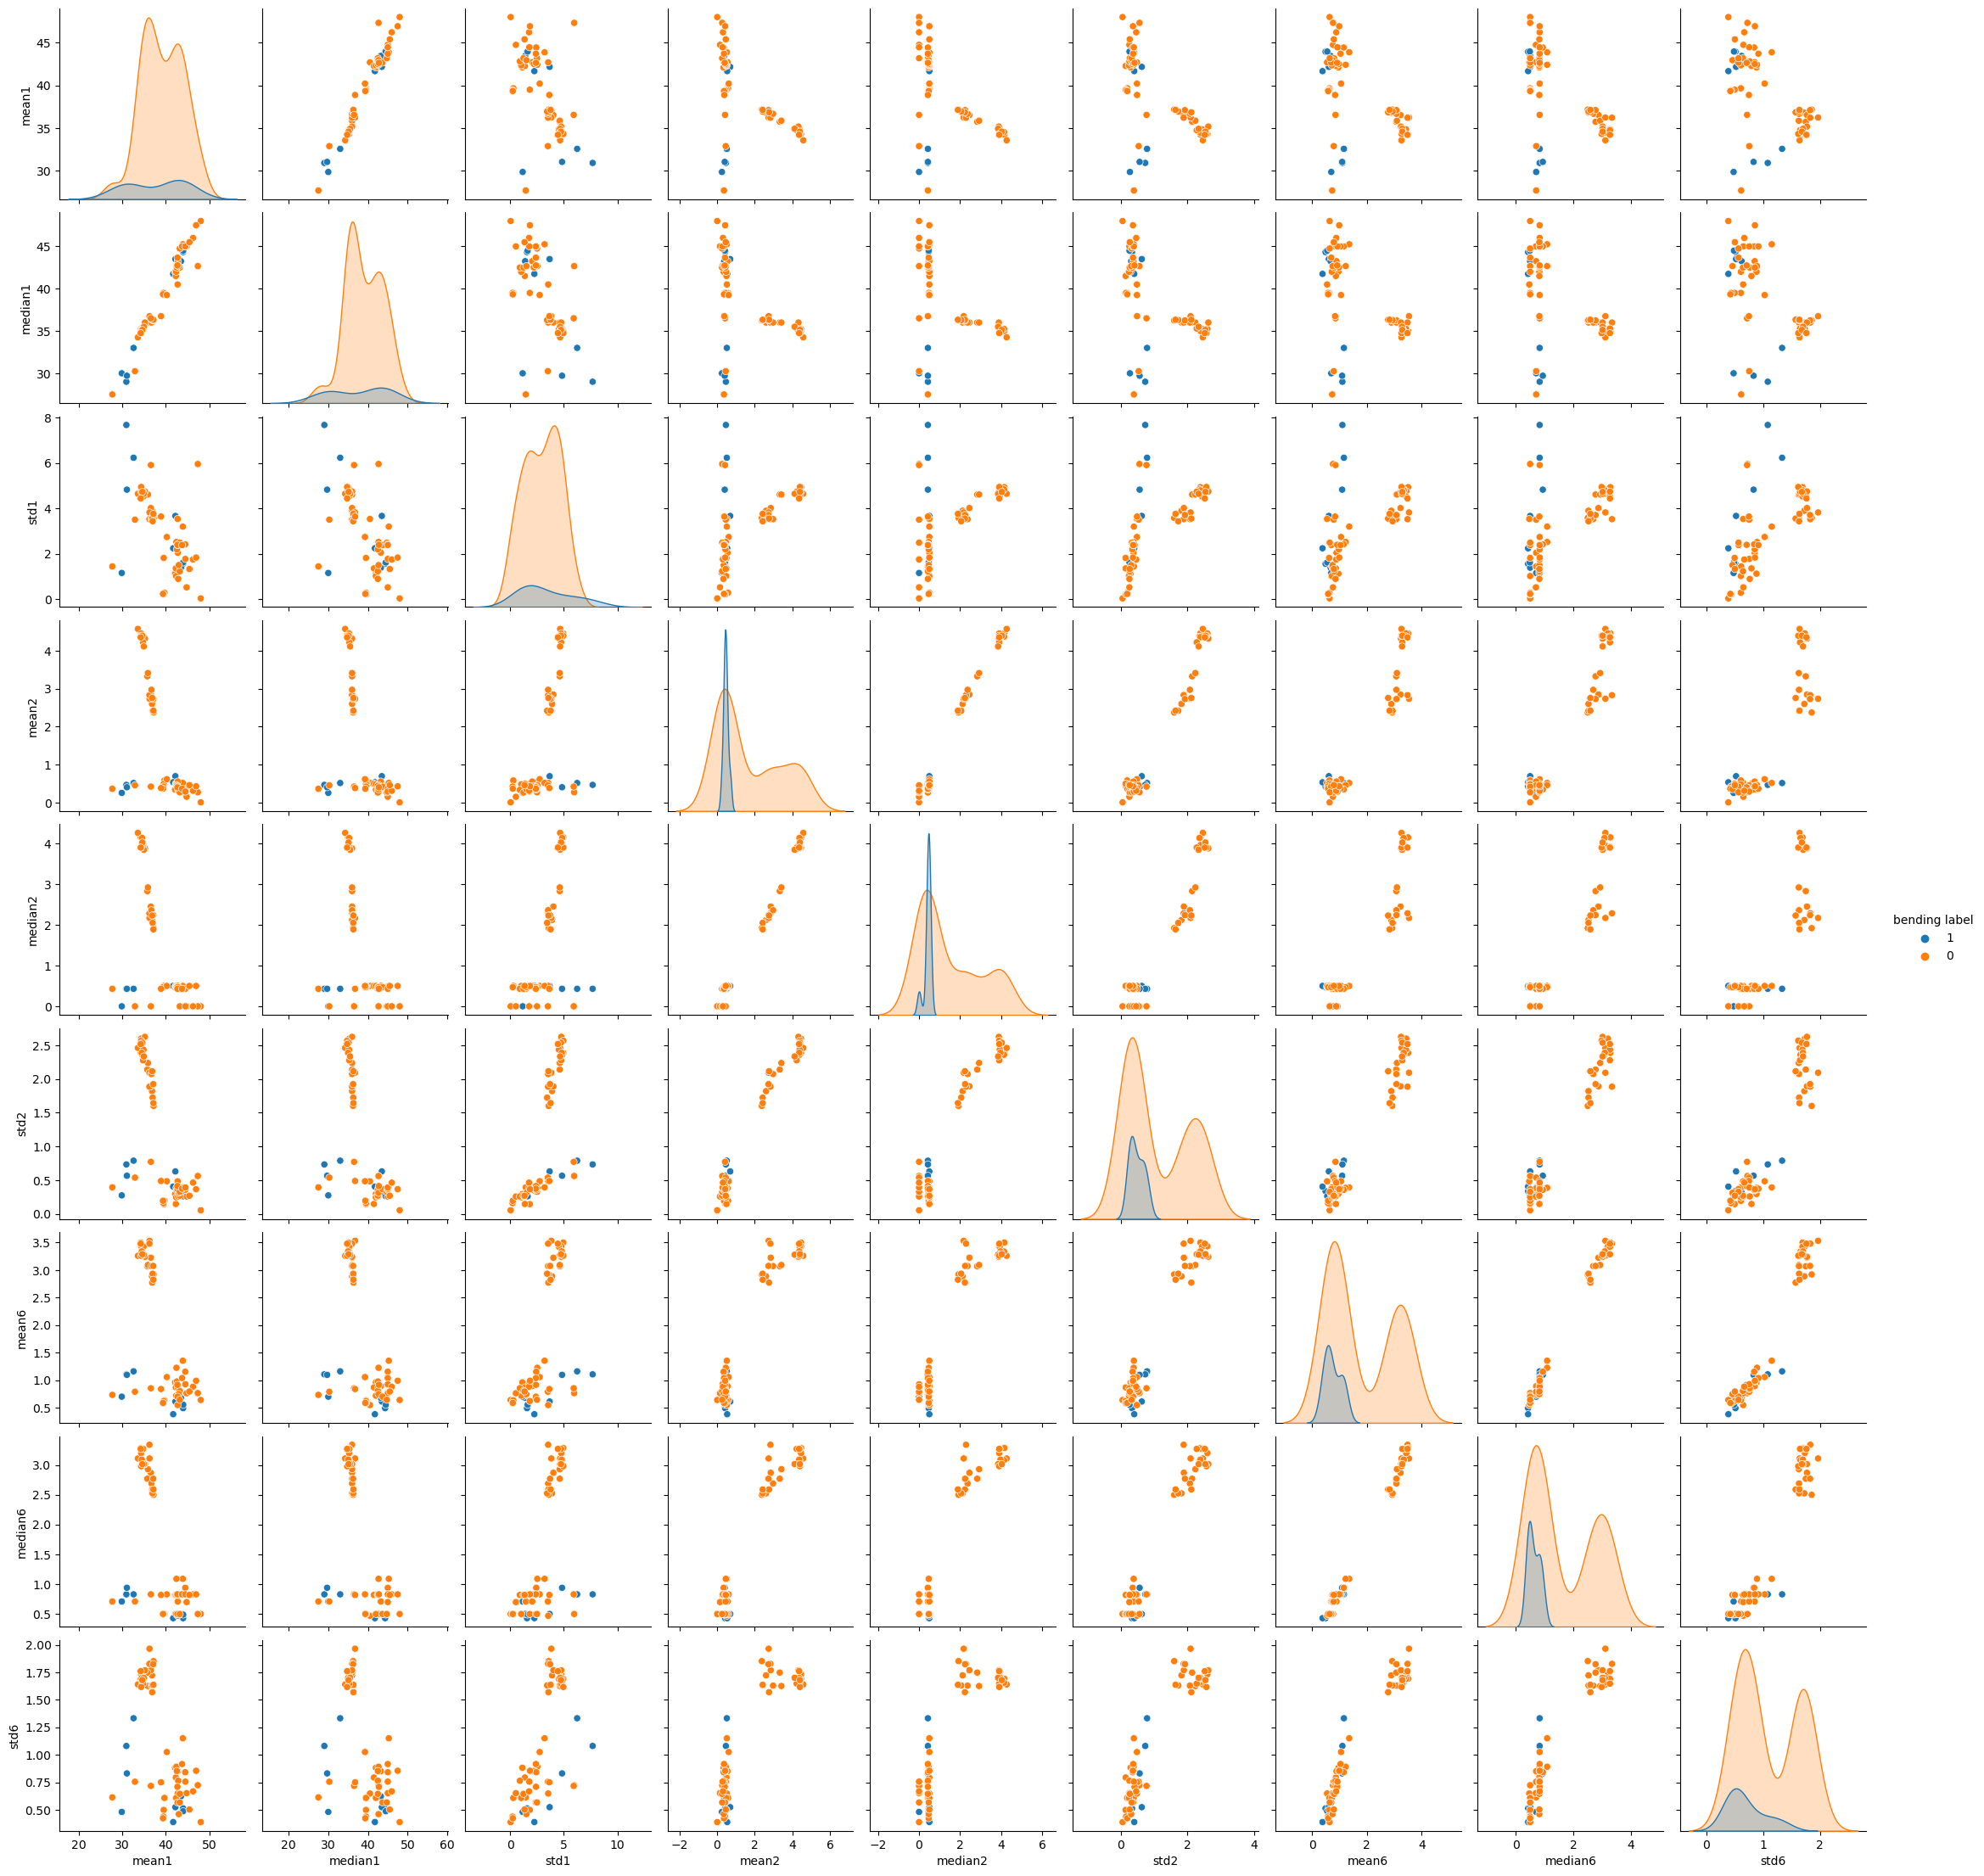

In [30]:
sns.pairplot(select_features_train_df, hue='bending label')
plt.show()
#bending label 1 denotes that the activity is bending
#bending label 0 denotes that the activity is not bending

#### ii. Splitted Plots

#### 2 (a) (ii) Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i

In [31]:
feats = [ 'mean', 'median','std']
#time_series=["avg_rss12","var_rss12","var_rss23"]
t=[1,2,6]
splits=2
plot_cols = []
for s in range(splits):
    for i in t:
        for f in feats:
        
             plot_cols.append(f + str(i)+"_split"+str(s+1))
plot_cols.append("bending label")

print(plot_cols)

['mean1_split1', 'median1_split1', 'std1_split1', 'mean2_split1', 'median2_split1', 'std2_split1', 'mean6_split1', 'median6_split1', 'std6_split1', 'mean1_split2', 'median1_split2', 'std1_split2', 'mean2_split2', 'median2_split2', 'std2_split2', 'mean6_split2', 'median6_split2', 'std6_split2', 'bending label']


In [32]:
def get_df_with_splits(paths,l):
    feats = [ 'mean', 'std','min','1st quartile','median','3rd quartile','max']
#time_series=["avg_rss12","var_rss12","var_rss23"]
    t=[1,2,3,4,5,6]
    #splits=2
    cols_split = []
    for s in range(l):
        for i in t:
            for f in feats:
        
             cols_split.append(f + str(i)+"_split"+str(s+1))
    cols_split.append("bending label")
   # print(cols_split)
    
    features_df_split=pd.DataFrame(columns=cols_split)
    for path in paths:
        #print(path)
        filename=" ".join(path.split("/")[-2:-1])
    
        instance_df=pd.read_csv(path, skiprows=5, header=None,on_bad_lines='skip')
    #instance_df.columns=["time","avg_rss12","var_rss12","var_rss23"]
        instance_df.columns=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
        del instance_df['time']
    #instance_df= instance_df.drop(columns=["time","avg_rss13","var_rss13","avg_rss23"])
    
    #split_instance_df=split_time_series(instance_df)
    
    #no_splits=2
        no_rows = instance_df.shape[0]
        len_split=int(no_rows/l)
        instance_row=[]
        for i in range(l):
       
            split_beg_index=len_split*i
            split_end_index=min(split_beg_index+len_split, no_rows)
            #print("desc")
            #print(instance_df[split_beg_index:split_end_index].describe())
            split_tdf = (instance_df[split_beg_index:split_end_index].describe().drop(['count']).T).values.flatten()
            #print(split_tdf)
            for v in split_tdf:
                instance_row.append(v)
        
        if 'bending' in filename:   
                instance_row.append("1")
        else: 
                instance_row.append("0")
        #print(instance_row)
        #print(len(instance_row))
    #time_domain_features_df.append(time_domain_feats_instance)
        features_df_split = features_df_split.append(pd.DataFrame([instance_row], columns=cols_split))
    
        
    
    features_df_split.reset_index(drop=True, inplace=True)
    
    return features_df_split
    
    

In [33]:
select_features_train_df_split_2=get_df_with_splits(train_paths,2)
select_features_train_df_split_2

mean1_split1  std1_split1  min1_split1  1st quartile1_split1  \
0      44.057167     1.556971        36.50               43.2500   
1      43.278875     3.473355        33.75               42.0000   
2      41.621208     3.118644        33.00               39.6525   
3      44.117042     1.359836        39.00               43.5000   
4      43.486208     1.281976        36.67               42.3300   
..           ...          ...          ...                   ...   
64     34.966250     4.733014        22.33               32.0000   
65     34.737042     4.276717        21.50               32.0000   
66     33.886458     5.143776        18.33               30.4575   
67     34.836458     4.869092        18.33               32.0000   
68     34.329333     4.549837        23.00               31.3100   

    median1_split1  3rd quartile1_split1  max1_split1  mean2_split1  \
0           44.500               45.0000        46.50      0.381042   
1           45.000               45.2500        47.75      0.673292   
2           42.330               44.2500        45.75      0.623083   
3           45.000               45.0000        48.00      0.250042   
4           43.710               44.5000        45.00      0.378667   
..             ...                   ...          ...           ...   
64          35.500               38.7500        46.00      4.207958   
65          35.500               37.7500        45.67      4.217333   
66          34.375               37.5000        45.00      4.332208   
67          35.750               38.6900        44.00      4.257750   
68          34.710               37.5425        42.75      4.315917   

    std2_split1  min2_split1  ...  3rd quartile5_split2  max5_split2  \
0      0.329540          0.0  ...               36.2500        38.25   
1      0.634285          0.0  ...               33.7500        38.50   
2      0.489595          0.0  ...               30.5625        36.00   
3      0.314099          0.0  ...               23.7500        26.00   
4      0.284434          0.0  ...               23.5000        26.00   
..          ...          ...  ...                   ...          ...   
64     2.331940          0.0  ...               18.5000        25.25   
65     2.337759          0.0  ...               18.2500        25.00   
66     2.453111          0.0  ...               18.2500        24.00   
67     2.512633          0.0  ...               18.2500        23.00   
68     2.470266          0.0  ...               18.0000        24.00   

    mean6_split2  std6_split2  min6_split2  1st quartile6_split2  \
0       0.388333     0.478528         0.00                0.0000   
1       0.586083     0.491873         0.00                0.0000   
2       0.347500     0.363144         0.00                0.0000   
3       0.543875     0.473445         0.00                0.4300   
4       0.585750     0.487918         0.00                0.4225   
..           ...          ...          ...                   ...   
64      3.430208     1.647979         0.00                2.1700   
65      3.225917     1.665326         0.00                2.0500   
66      3.274750     1.670593         0.00                2.0500   
67      3.409458     1.707089         0.47                2.1700   
68      3.577833     1.794112         0.43                2.2900   

    median6_split2  3rd quartile6_split2  max6_split2  bending label  
0            0.000                0.7100         1.50              1  
1            0.470                0.8700         2.18              1  
2            0.430                0.5000         1.50              1  
3            0.500                0.7100         4.06              1  
4            0.500                0.8300         2.96              1  
..             ...                   ...          ...            ...  
64           3.350                4.4400         9.39              0  
65           3.085                4.3500        10.21              0  
66           

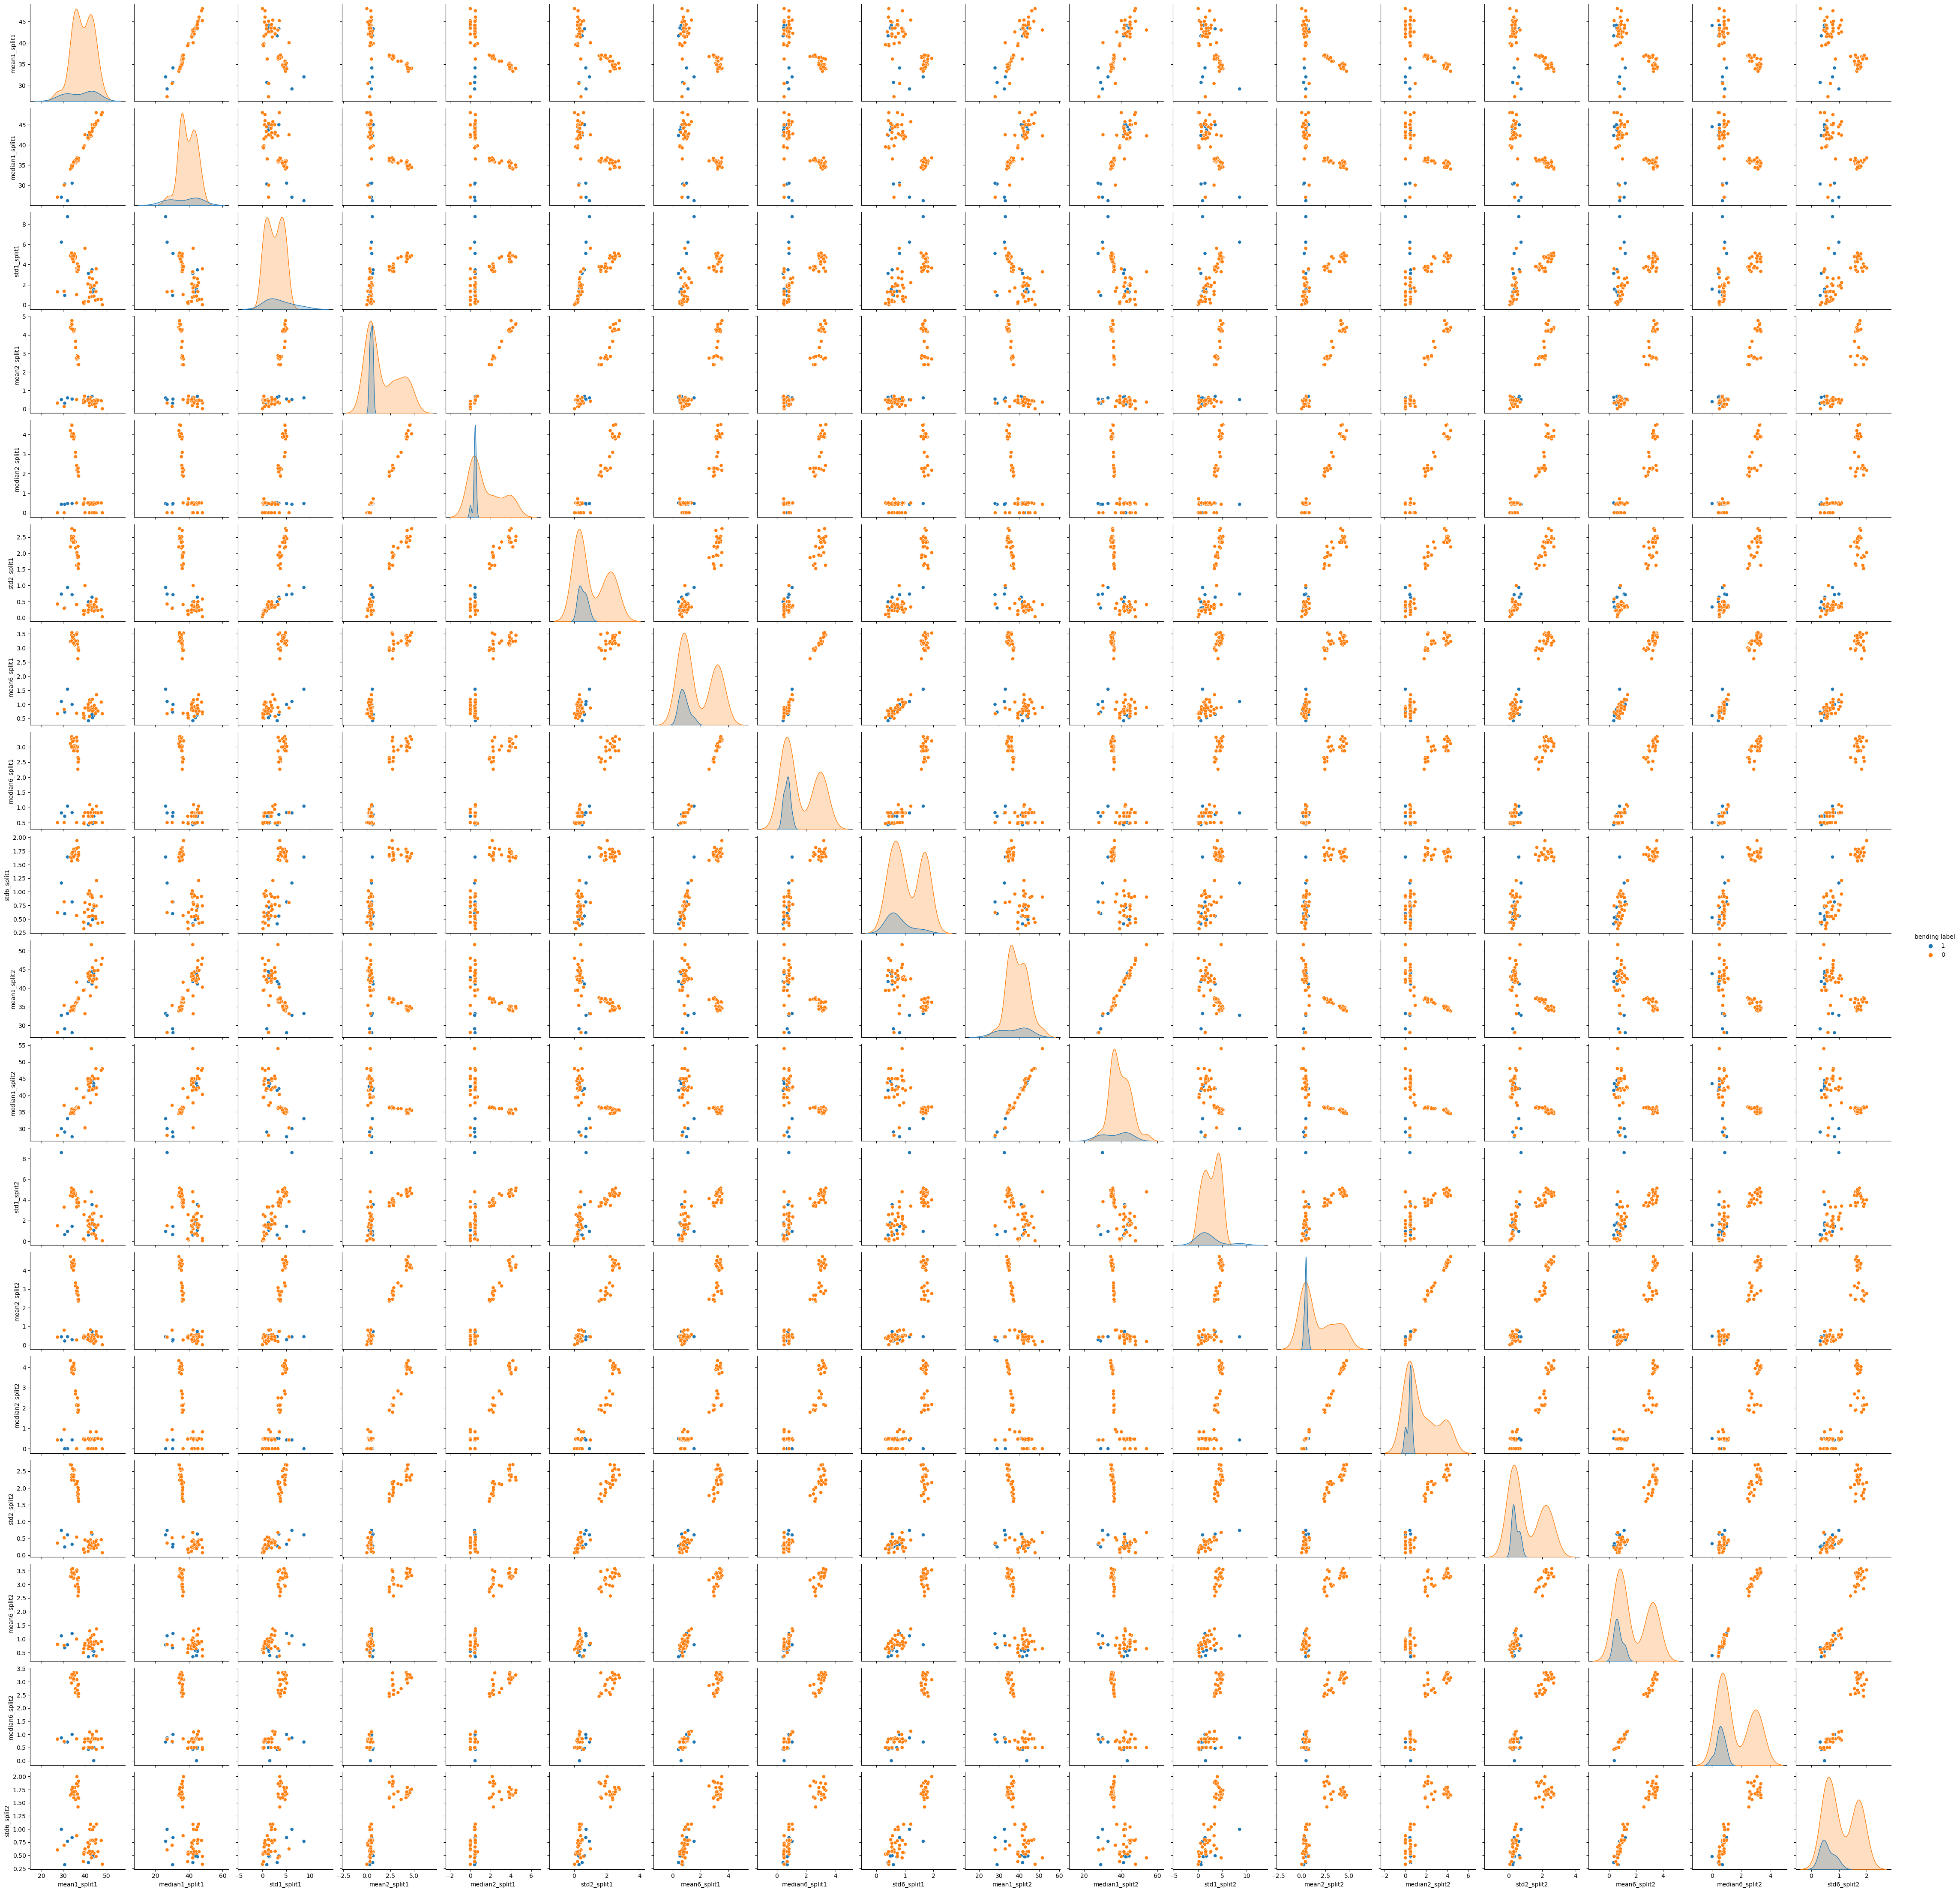

In [34]:
sns.pairplot(select_features_train_df_split_2[plot_cols], hue='bending label')
plt.show()
#bending label 1 denotes that the activity is bending
#bending label 0 denotes that the activity is not bending

#### On comparing the plots obtained in section 2 (a) (ii) (after breaking each time series in your training set into two (approximately) equal length time series and repeating the experiment) with the plots obtained previously in section 2 (a) (i), we notice the results to be almost the same at first glance. There is no considerable difference between them.

#### iii. Time Series Segments

#### 2 (a) (iii) Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination.Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed

In [35]:
def oversampling(df):
    count_0 = df['bending label'].value_counts()["0"]
    count_1 = df['bending label'].value_counts()["1"]
   # print(count_0)
    #print(count_1)
    #train_df.loc[train_df['type'] == 0].shape[0]
    
    #total1 = train_df.loc[train_df['type'] == 1].shape[0]
    if count_0<count_1:
        minor_class_count=count_0
        minor_class="0"
        major_class_count=count_1
        major_class="1"
    else:
        minor_class_count=count_1
        minor_class="1"
        major_class_count=count_0
        major_class="0"
        
    minor_df = df[df['bending label'] == minor_class]
    #print(minor_df)
    
    major_df = df[df['bending label'] == major_class]
    #print(max(count_0, count_1))
    minor_df = resample(minor_df, replace = True, random_state = 60, n_samples = max(count_0, count_1))
    train_df = pd.concat([major_df, minor_df])
    train_df.reset_index(drop=True, inplace=True)
    return train_df
    

In [36]:
def logistic_regression(train_paths, test_paths, l, cv_folds, oversample=False, penalty='none'):
    print("Logistic Regression : l = "+str(l))
    train_data=get_df_with_splits(train_paths,l) 
    if oversample:
        train_data = oversampling(train_data)
    
    #trainX, trainY = get_data_X_Y(train_set)
    train_X = train_data.iloc[:, :-1]
    train_Y = train_data.iloc[:, -1]
    #print(train_Y)
    solver = 'lbfgs'
    validator = StratifiedKFold(n_splits=cv_folds, shuffle=True,random_state=36)
    model = LogisticRegression(penalty=penalty, solver=solver,max_iter=100)
    selector = RFECV(estimator=model, cv=validator, scoring='accuracy')
    selector.fit(train_X, train_Y)
    #print(selector.score(train_X, train_Y))
    return model, selector

In [37]:
cv_folds = 5
l_values = np.arange(1,21)
logreg_results = {'l': [],'p':[],'score': []}
best_score, best_l,corres_p = 0,1,1
for l in l_values:
    model, selector= logistic_regression(train_paths, test_paths, l, cv_folds, oversample=False)
    #nf = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    logreg_results['l'].append(l)
    p=selector.n_features_
    logreg_results['p'].append(p)
    logreg_results['score'].append(score)
    if score>best_score:
        best_score=score
        best_l=l
        corres_p=p
    
    


Logistic Regression : l = 1
Logistic Regression : l = 2
Logistic Regression : l = 3
Logistic Regression : l = 4
Logistic Regression : l = 5
Logistic Regression : l = 6
Logistic Regression : l = 7
Logistic Regression : l = 8
Logistic Regression : l = 9
Logistic Regression : l = 10
Logistic Regression : l = 11
Logistic Regression : l = 12
Logistic Regression : l = 13
Logistic Regression : l = 14
Logistic Regression : l = 15
Logistic Regression : l = 16
Logistic Regression : l = 17
Logistic Regression : l = 18
Logistic Regression : l = 19
Logistic Regression : l = 20


In [38]:
logreg_results_df = pd.DataFrame(logreg_results)
logreg_results_df

l    p     score
0    1    5  1.000000
1    2    4  0.970330
2    3    5  0.971429
3    4    9  0.971429
4    5   10  0.971429
5    6   12  0.971429
6    7    7  0.957143
7    8    7  0.971429
8    9    7  0.971429
9   10    6  0.971429
10  11    1  0.957143
11  12    6  1.000000
12  13  101  0.985714
13  14    3  0.971429
14  15    1  0.971429
15  16   16  0.985714
16  17   11  1.000000
17  18   12  0.985714
18  19   15  0.985714
19  20   13  0.985714

In [39]:
print("Best (l-p) pair : ( " + str(best_l) + " - "+ str(corres_p) + " ) ")

Best (l-p) pair : ( 1 - 5 ) 


##### We consider the optimal l to be 1

In [40]:
#best_l=1
model_bestl, selector_bestl = logistic_regression(train_paths, test_paths, l=best_l, cv_folds=5, oversample=False)
train_df_bestl=get_df_with_splits(train_paths,best_l)
all_features=train_df_bestl.columns[:-1]
#print(all_features)
selected_features = []
for i, feature in enumerate(all_features):
        if selector_bestl.support_[i]:
            selected_features.append(feature)
print(selected_features)

Logistic Regression : l = 1
['3rd quartile1_split1', 'max2_split1', 'min5_split1', '1st quartile5_split1', 'max5_split1']


#### We perform cross-validation to obtain an estimate on the error in test data. Therefore, it is important that we do not deprive our algorithm of the knowledge from numerous predictors available in the dataset. Hence, the right way is to perform recursive feature elimination with cross-validation.The wrong way would be to perform recursive feature elimination before performing cross-validation.



#### 2 (a) (iv) Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them

#### iv. Confusion Matrix

In [41]:
#confusion matrix - train data
train_X = train_df_bestl.iloc[:, :-1]
train_Y = train_df_bestl.iloc[:, -1]
# refit logistic regression model using pruned set of features
model_bestl.fit(train_X.loc[:, selected_features], train_Y.to_numpy(dtype="int"))
pred_Y = model_bestl.predict(train_X.loc[:, selected_features])
predY_prob = model_bestl.predict_proba(train_X.loc[:, selected_features])
y_true = train_Y.to_numpy(dtype=float)
y_pred = pred_Y.round()
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[60  0]
 [ 0  9]]


#### iv. ROC and AUC

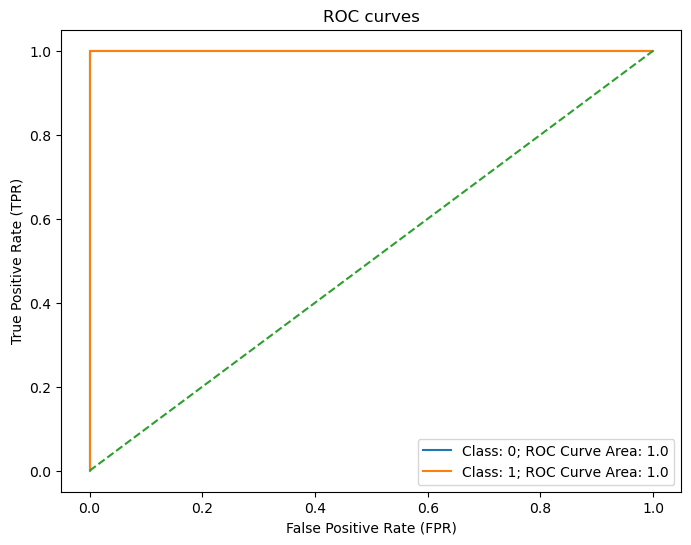

In [42]:
#roc tpr vs fpr - train

fig, axes = plt.subplots(figsize=(8, 6))
axes.set_title("ROC curves")
for i, c in enumerate(model_bestl.classes_):
        y_prediction = predY_prob[:, i]
        fpr, tpr, thresholds = roc_curve(y_true, y_prediction, pos_label=c)
        roc_auc = auc(fpr, tpr)
        axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate (FPR)")
axes.set_ylabel("True Positive Rate (TPR)")
axes.legend()
plt.show()

#### iv. parameters of logistic regression and associated p-values


In [43]:
#statsmodel

df_select_features = train_X.loc[:, selected_features]
const_val = sm.add_constant(df_select_features.to_numpy(dtype=float))
model = sm.Logit(train_Y.to_numpy(dtype=float), const_val)
summary = model.fit(method='bfgs').summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            5
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                   1.000
Time:                        22:51:45   Log-Likelihood:            -1.5602e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.738e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0993   2.87e+08  -3.8

#### v. Test Classifier

#### Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.



In [44]:
test_df_bestl=get_df_with_splits(test_paths,best_l)
test_df_bestl

mean1_split1  std1_split1  min1_split1  1st quartile1_split1  \
0      40.624792     1.476967        37.25               39.2500   
1      42.812812     1.435550        38.00               42.0000   
2      24.562958     3.737514        12.75               23.1875   
3      27.464604     3.583582         0.00               25.5000   
4      37.177042     3.581301        24.25               34.5000   
5      37.561187     3.226507        28.75               35.2500   
6      37.058708     3.710180        22.00               34.5000   
7      27.716375     1.442253        23.50               27.0000   
8      44.182937     7.495615        24.75               48.0000   
9      48.004167     0.032038        48.00               48.0000   
10     42.363563     2.068247        33.25               42.0000   
11     45.917667     1.089027        37.00               45.0000   
12     45.239667     0.429915        44.50               45.0000   
13     44.334729     2.476940        33.33               42.2500   
14     43.174938     1.989052        35.50               42.5000   
15     42.760562     3.398919        32.75               41.3300   
16     34.227771     4.889576        19.33               30.5000   
17     33.509729     4.850923        12.50               30.5000   
18     34.660583     5.315110        15.00               31.0000   

    median1_split1  3rd quartile1_split1  max1_split1  mean2_split1  \
0           40.500               42.0000        45.00      0.358604   
1           42.500               43.6700        45.67      0.372437   
2           24.250               26.5000        51.00      0.590833   
3           28.000               30.0000        42.75      0.449708   
4           36.250               40.2500        45.00      2.374208   
5           36.875               40.2500        44.75      2.080687   
6           36.000               40.0625        44.67      2.438146   
7           27.500               29.0000        30.00      0.363687   
8           48.000               48.0000        48.33      0.101875   
9           48.000               48.0000        48.25      0.007167   
10          43.000               43.5000        48.00      0.492563   
11          45.635               46.5000        50.75      0.324542   
12          45.000               45.3300        46.75      0.172958   
13          45.000               46.5000        48.00      0.432958   
14          43.670               44.5000        46.25      0.506583   
15          44.500               45.3725        47.00      0.486167   
16          35.500               37.7500        43.50      3.995729   
17          34.125               36.7500        45.00      4.450771   
18          35.000               38.2500        46.75      4.200896   

    std2_split1  min2_split1  ...  3rd quartile5_split1  max5_split1  \
0      0.322605          0.0  ...               36.0000        38.25   
1      0.289158          0.0  ...               34.5000        38.50   
2      0.837408          0.0  ...               27.0000        30.00   
3      0.767197          0.0  ...               20.7500        33.00   
4      1.601799          0.0  ...               21.7500        25.50   
5      1.639258          0.0  ...               21.5000        24.33   
6      1.996887          0.0  ...               21.0000        24.25   
7      0.394817          0.0  ...               10.7500        21.00   
8      0.346756          0.0  ...                5.5425        12.75   
9      0.055106          0.0  ...               10.0000        12.00   
10     0.403581          0.0  ...               17.6900        28.00   
11     0.365820          0.0  ...               21.0000        24.00   
12     0.251176          0.0  ...               21.0000        26.75   
13     0.370591          0.0  ...               17.7500        23.00   
14     0.307413          0.0  ...               16.5000        21.25   
15     0.446511          0.0  ...               18.5650        21.33  

In [45]:
test_X = test_df_bestl.iloc[:, :-1]
test_Y = test_df_bestl.iloc[:, -1]
test_pred_Y = model_bestl.predict(test_X.loc[:, selected_features])
test_predY_prob = model_bestl.predict_proba(test_X.loc[:, selected_features])
y_true_test = test_Y.to_numpy(dtype=float)
y_pred_test = test_pred_Y.round()
test_cm = confusion_matrix(y_true_test, y_pred_test)
print(test_cm)

[[15  0]
 [ 0  4]]


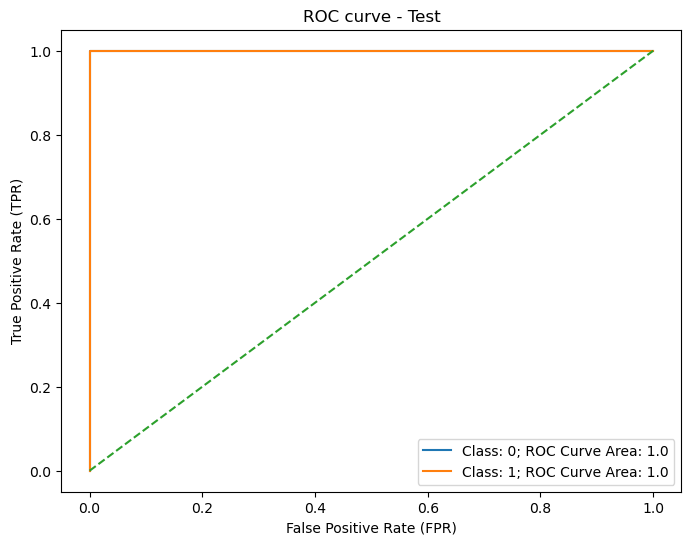

In [46]:
fig, axes = plt.subplots(figsize=(8, 6))
axes.set_title("ROC curve - Test")
for i, c in enumerate(model_bestl.classes_):
        y_prediction_test = test_predY_prob[:, i]
        fpr, tpr, thresholds = roc_curve(y_true_test, y_prediction_test, pos_label=c)
        roc_auc = auc(fpr, tpr)
        axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate (FPR)")
axes.set_ylabel("True Positive Rate (TPR)")
axes.legend()
plt.show()

####  The accuracy for test set as well as cross validation accuracy obtained previously seem to be almost the same.

#### vi. Separation

#### 2 (a) (vi) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?


#### The p-value analysis using statsmodels suggests that there is complete separation.In this case, the maximum likelihood estimator doesn't exist and the parameters are not identified. As a result, it is possible that the well-separated classes may be causing the instability in calculating logistic regression parameters.

#### vii. Imbalance

#### 2 (a) (vii) From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.


#### Yes, imbalanced classes are observed from the confusion matrices obtained. There are 60 instances of class 0 (not bending) and only 9 instances of class 1 (bending). This indicates that the data has imbalance and we need to carry out oversampling.

In [47]:
cv_folds = 5
l_values = np.arange(1,21)
best_score, best_l,corres_p = 0,1,1
logreg_results2 = {'l': [],'p':[],'score': []}
for l in l_values:
    model, selector = logistic_regression(train_paths, test_paths, l, cv_folds, oversample=True)
    #nf = selector.n_features_
    score = selector.cv_results_['mean_test_score'].max()
    logreg_results2['l'].append(l)
    p=selector.n_features_
    logreg_results2['p'].append(p)
    logreg_results2['score'].append(score)
    if score>best_score:
        best_score=score
        best_l=l
        corres_p=p

Logistic Regression : l = 1
Logistic Regression : l = 2
Logistic Regression : l = 3
Logistic Regression : l = 4
Logistic Regression : l = 5
Logistic Regression : l = 6
Logistic Regression : l = 7
Logistic Regression : l = 8
Logistic Regression : l = 9
Logistic Regression : l = 10
Logistic Regression : l = 11
Logistic Regression : l = 12
Logistic Regression : l = 13
Logistic Regression : l = 14
Logistic Regression : l = 15
Logistic Regression : l = 16
Logistic Regression : l = 17
Logistic Regression : l = 18
Logistic Regression : l = 19
Logistic Regression : l = 20


In [48]:
results_df_oversampling = pd.DataFrame(logreg_results2)
results_df_oversampling

l  p     score
0    1  7  1.000000
1    2  6  1.000000
2    3  4  1.000000
3    4  2  0.991667
4    5  6  1.000000
5    6  2  0.991667
6    7  4  1.000000
7    8  3  0.991667
8    9  3  0.991667
9   10  4  0.991667
10  11  1  0.991667
11  12  2  0.991667
12  13  5  1.000000
13  14  9  1.000000
14  15  5  1.000000
15  16  3  0.991667
16  17  8  1.000000
17  18  4  1.000000
18  19  2  1.000000
19  20  5  1.000000

In [49]:
print("Best (l-p) pair : ( " + str(best_l) + " - "+ str(corres_p) + " ) ")

Best (l-p) pair : ( 1 - 7 ) 


##### We consider optimal l to be 1

In [50]:
#best l=1 
#oversampling
#best_l=1
model_bestl, selector_bestl= logistic_regression(train_paths, test_paths, l=best_l, cv_folds=5, oversample=True)
train_df_bestl=get_df_with_splits(train_paths,best_l)
all_features=train_df_bestl.columns[:-1]
#print(all_features)
selected_features = []
for i, feature in enumerate(all_features):
        if selector_bestl.support_[i]:
            selected_features.append(feature)
            
print(selected_features)

Logistic Regression : l = 1
['3rd quartile1_split1', 'median3_split1', 'mean5_split1', 'min5_split1', '1st quartile5_split1', 'max5_split1', 'max6_split1']


#### confusion matrix

In [51]:
#confusion matrix - train
train_df_bestl = oversampling(train_df_bestl)
train_X = train_df_bestl.iloc[:, :-1]
train_Y = train_df_bestl.iloc[:, -1]
model_bestl.fit(train_X.loc[:, selected_features], train_Y.to_numpy(dtype="int"))
pred_Y = model_bestl.predict(train_X.loc[:, selected_features])
predY_prob = model_bestl.predict_proba(train_X.loc[:, selected_features])
y_true = train_Y.to_numpy(dtype=float)
y_pred = pred_Y.round()
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[60  0]
 [ 0 60]]


#### ROC and AUC

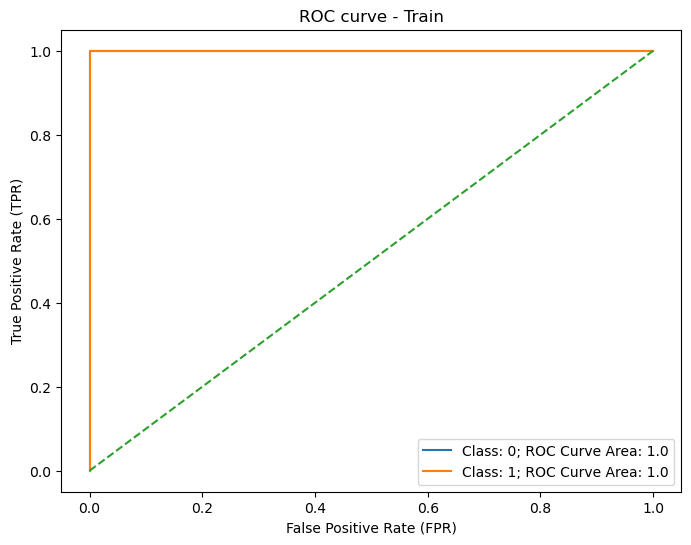

In [52]:
#roc tpr vs fpr - train

fig, axes = plt.subplots(figsize=(8, 6))
axes.set_title("ROC curve - Train")
for i, c in enumerate(model_bestl.classes_):
        y_prediction = predY_prob[:, i]
        fpr, tpr, thresholds = roc_curve(y_true, y_prediction, pos_label=c)
        roc_auc = auc(fpr, tpr)
        axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate (FPR)")
axes.set_ylabel("True Positive Rate (TPR)")
axes.legend()
plt.show()

In [53]:
test_df_bestl=get_df_with_splits(test_paths,best_l)
test_df_bestl

mean1_split1  std1_split1  min1_split1  1st quartile1_split1  \
0      40.624792     1.476967        37.25               39.2500   
1      42.812812     1.435550        38.00               42.0000   
2      24.562958     3.737514        12.75               23.1875   
3      27.464604     3.583582         0.00               25.5000   
4      37.177042     3.581301        24.25               34.5000   
5      37.561187     3.226507        28.75               35.2500   
6      37.058708     3.710180        22.00               34.5000   
7      27.716375     1.442253        23.50               27.0000   
8      44.182937     7.495615        24.75               48.0000   
9      48.004167     0.032038        48.00               48.0000   
10     42.363563     2.068247        33.25               42.0000   
11     45.917667     1.089027        37.00               45.0000   
12     45.239667     0.429915        44.50               45.0000   
13     44.334729     2.476940        33.33               42.2500   
14     43.174938     1.989052        35.50               42.5000   
15     42.760562     3.398919        32.75               41.3300   
16     34.227771     4.889576        19.33               30.5000   
17     33.509729     4.850923        12.50               30.5000   
18     34.660583     5.315110        15.00               31.0000   

    median1_split1  3rd quartile1_split1  max1_split1  mean2_split1  \
0           40.500               42.0000        45.00      0.358604   
1           42.500               43.6700        45.67      0.372437   
2           24.250               26.5000        51.00      0.590833   
3           28.000               30.0000        42.75      0.449708   
4           36.250               40.2500        45.00      2.374208   
5           36.875               40.2500        44.75      2.080687   
6           36.000               40.0625        44.67      2.438146   
7           27.500               29.0000        30.00      0.363687   
8           48.000               48.0000        48.33      0.101875   
9           48.000               48.0000        48.25      0.007167   
10          43.000               43.5000        48.00      0.492563   
11          45.635               46.5000        50.75      0.324542   
12          45.000               45.3300        46.75      0.172958   
13          45.000               46.5000        48.00      0.432958   
14          43.670               44.5000        46.25      0.506583   
15          44.500               45.3725        47.00      0.486167   
16          35.500               37.7500        43.50      3.995729   
17          34.125               36.7500        45.00      4.450771   
18          35.000               38.2500        46.75      4.200896   

    std2_split1  min2_split1  ...  3rd quartile5_split1  max5_split1  \
0      0.322605          0.0  ...               36.0000        38.25   
1      0.289158          0.0  ...               34.5000        38.50   
2      0.837408          0.0  ...               27.0000        30.00   
3      0.767197          0.0  ...               20.7500        33.00   
4      1.601799          0.0  ...               21.7500        25.50   
5      1.639258          0.0  ...               21.5000        24.33   
6      1.996887          0.0  ...               21.0000        24.25   
7      0.394817          0.0  ...               10.7500        21.00   
8      0.346756          0.0  ...                5.5425        12.75   
9      0.055106          0.0  ...               10.0000        12.00   
10     0.403581          0.0  ...               17.6900        28.00   
11     0.365820          0.0  ...               21.0000        24.00   
12     0.251176          0.0  ...               21.0000        26.75   
13     0.370591          0.0  ...               17.7500        23.00   
14     0.307413          0.0  ...               16.5000        21.25   
15     0.446511          0.0  ...               18.5650        21.33  

In [54]:
test_X = test_df_bestl.iloc[:, :-1]
test_Y = test_df_bestl.iloc[:, -1]
test_pred_Y = model_bestl.predict(test_X.loc[:, selected_features])
test_predY_prob = model_bestl.predict_proba(test_X.loc[:, selected_features])
y_true_test = test_Y.to_numpy(dtype=float)
y_pred_test = test_pred_Y.round()
test_cm = confusion_matrix(y_true_test, y_pred_test)
print(test_cm)

[[15  0]
 [ 0  4]]


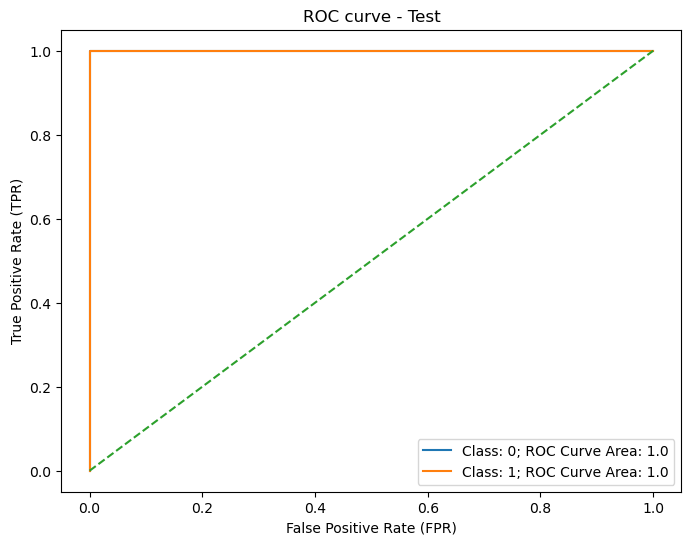

In [55]:
fig, axes = plt.subplots(figsize=(8, 6))
axes.set_title("ROC curve - Test")
for i, c in enumerate(model_bestl.classes_):
        y_prediction_test = test_predY_prob[:, i]
        fpr, tpr, thresholds = roc_curve(y_true_test, y_prediction_test, pos_label=c)
        roc_auc = auc(fpr, tpr)
        axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate (FPR)")
axes.set_ylabel("True Positive Rate (TPR)")
axes.legend()
plt.show()

####  2 (b) Binary Classification Using L1-penalized logistic regression

#### 2 (b) (i) Repeat 2(a)iii using L1-penalized logistic regression,i.e. instead of using p-values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [82]:
def logistic_regression_l1_penalty(train_paths, test_paths, l, cv_folds,cm_roc=False):
    print("L1 Penalized Logistic Regression : l = "+str(l))
    train_df=get_df_with_splits(train_paths,l)
    test_df=get_df_with_splits(test_paths,l)
    train_X, train_Y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
    test_X, test_Y = test_df.iloc[:, :-1], test_df.iloc[:, -1]
    
    train_Y = train_Y.astype('int')
    test_Y = test_Y.astype('int')
    model = LogisticRegressionCV(penalty = 'l1', max_iter = 100, scoring = 'accuracy',cv = cv_folds, random_state = 69, solver = 'liblinear')  
    model.fit(train_X, train_Y)
    train_score=model.score(train_X, train_Y)
    test_score=model.score(test_X, test_Y)
    train_error= 1 - np.round(train_score,4)
    test_error= 1 - np.round(test_score,4)
    if cm_roc==False:
        return [l, np.round(train_score,4), train_error,np.round(test_score,4),test_error]
    else:
        train_predict = model.predict_proba(train_X)
        test_predict = model.predict_proba(test_X)
        pred_y = model.predict(test_X)
        cm = confusion_matrix(test_Y, pred_y)
        
        print("Confusion matrix for Test Data:\n{}".format(cm))
        print("\nROC Curve for Train Data")
        #plot_roc(train_Y, train_predict, model)
        
        fig, axes = plt.subplots(figsize=(9, 7))
        axes.set_title("ROC curve - Train")
        for i, c in enumerate(model.classes_):
            y_prediction = train_predict[:, i]
            fpr, tpr, thresholds = roc_curve(train_Y, y_prediction, pos_label=c)
            roc_auc = auc(fpr, tpr)
            axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate (FPR)")
        axes.set_ylabel("True Positive Rate (TPR)")
        axes.legend()
        plt.show()
        
        print("\nROC Curve for Test Data")
        #plot_roc(test_Y, test_predict, model)
        fig, axes = plt.subplots(figsize=(9, 7))
        axes.set_title("ROC curve - Test")
        for i, c in enumerate(model.classes_):
            y_prediction = test_predict[:, i]
            fpr, tpr, thresholds = roc_curve(test_Y, y_prediction, pos_label=c)
            roc_auc = auc(fpr, tpr)
            axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate (FPR)")
        axes.set_ylabel("True Positive Rate (TPR)")
        axes.legend()
        plt.show()

In [57]:
best_test_score, best_l = 0, 1
result=[]
for l in l_values:
    #print(l)
    result.append(logistic_regression_l1_penalty(train_paths, test_paths, l, cv_folds=5))
    if result[-1][1] > best_test_score:
        best_test_score = result[-1][1]
        best_l = l

L1 Penalized Logistic Regression : l = 1
L1 Penalized Logistic Regression : l = 2
L1 Penalized Logistic Regression : l = 3
L1 Penalized Logistic Regression : l = 4
L1 Penalized Logistic Regression : l = 5
L1 Penalized Logistic Regression : l = 6
L1 Penalized Logistic Regression : l = 7
L1 Penalized Logistic Regression : l = 8
L1 Penalized Logistic Regression : l = 9
L1 Penalized Logistic Regression : l = 10
L1 Penalized Logistic Regression : l = 11
L1 Penalized Logistic Regression : l = 12
L1 Penalized Logistic Regression : l = 13
L1 Penalized Logistic Regression : l = 14
L1 Penalized Logistic Regression : l = 15
L1 Penalized Logistic Regression : l = 16
L1 Penalized Logistic Regression : l = 17
L1 Penalized Logistic Regression : l = 18
L1 Penalized Logistic Regression : l = 19
L1 Penalized Logistic Regression : l = 20


In [58]:
result_logreg_l1 = pd.DataFrame(result, columns = ['l', 'Train Score','Train Error','Test Score','Test Error'])
result_logreg_l1

l  Train Score  Train Error  Test Score  Test Error
0    1          1.0          0.0      1.0000      0.0000
1    2          1.0          0.0      1.0000      0.0000
2    3          1.0          0.0      1.0000      0.0000
3    4          1.0          0.0      0.9474      0.0526
4    5          1.0          0.0      1.0000      0.0000
5    6          1.0          0.0      0.9474      0.0526
6    7          1.0          0.0      1.0000      0.0000
7    8          1.0          0.0      1.0000      0.0000
8    9          1.0          0.0      0.9474      0.0526
9   10          1.0          0.0      0.9474      0.0526
10  11          1.0          0.0      0.9474      0.0526
11  12          1.0          0.0      1.0000      0.0000
12  13          1.0          0.0      1.0000      0.0000
13  14          1.0          0.0      0.9474      0.0526
14  15          1.0          0.0      0.9474      0.0526
15  16          1.0          0.0      0.9474      0.0526
16  17          1.0          0.0      1.0000      0.0000
17  18          1.0          0.0      0.9474      0.0526
18  19          1.0          0.0      0.9474      0.0526
19  20          1.0          0.0      1.0000      0.0000

In [59]:
print("Best l-value : "+ str(best_l))

Best l-value : 1


#### We consider optimal l to be 1

L1 Penalized Logistic Regression : l = 1
Confusion matrix for Test Data:
[[15  0]
 [ 0  4]]

ROC Curve for Train Data


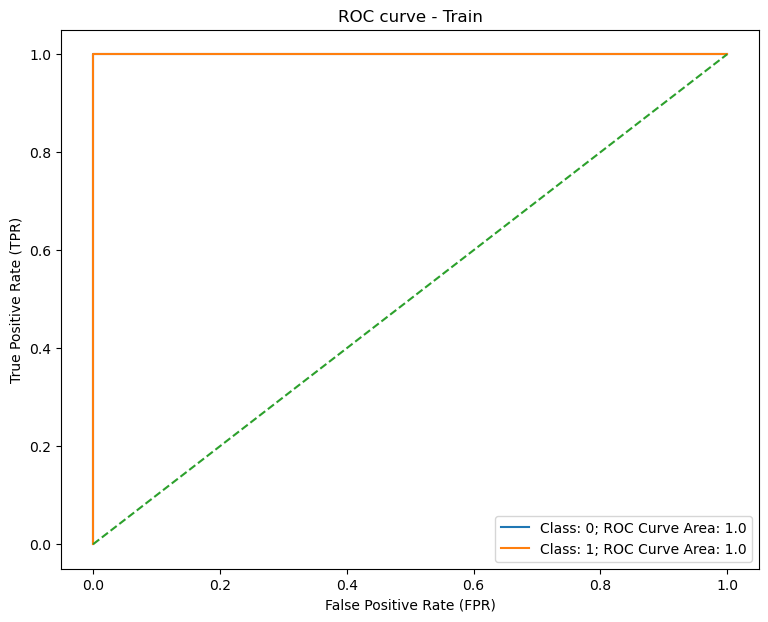


ROC Curve for Test Data


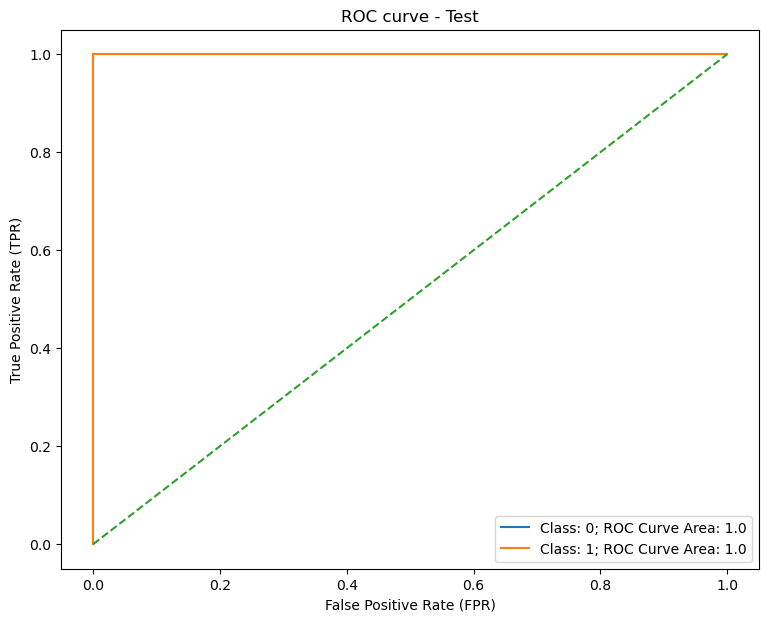

In [60]:
logistic_regression_l1_penalty(train_paths, test_paths, best_l, cv_folds=5,cm_roc=True)

#### 2 (b) (ii) Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?


#### The L1-penalized logistic regression and variable selection using p-values perform equally well in terms of accuracy on the test data (approximately ~ 1.0). 
#### The L1-penalized logistic regression is easier to implement as feature selection does not need to be done manually.

#### 2 (c) Multi-class Classification (The Realistic Case)

#### 2 (c) (i) Multinomial L1

#### Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.




In [61]:
def get_df_with_splits_multi(paths,l):
    feats = [ 'mean', 'std','min','1st quartile','median','3rd quartile','max']
#time_series=["avg_rss12","var_rss12","var_rss23"]
    t=[1,2,3,4,5,6]
    #splits=2
    cols_split = []
    for s in range(l):
        for i in t:
            for f in feats:
        
             cols_split.append(f + str(i)+"_split"+str(s+1))
    cols_split.append("activity label")
   # print(cols_split)
    
    features_df_split=pd.DataFrame(columns=cols_split)
    for path in paths:
        #print(path)
        filename=" ".join(path.split("/")[-2:-1])
    
        instance_df=pd.read_csv(path, skiprows=5, header=None,on_bad_lines='skip')
    #instance_df.columns=["time","avg_rss12","var_rss12","var_rss23"]
        instance_df.columns=["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
        del instance_df['time']
    #instance_df= instance_df.drop(columns=["time","avg_rss13","var_rss13","avg_rss23"])
    
    #split_instance_df=split_time_series(instance_df)
    
    #no_splits=2
        no_rows = instance_df.shape[0]
        len_split=int(no_rows/l)
        instance_row=[]
        for i in range(l):
       
            split_beg_index=len_split*i
            split_end_index=min(split_beg_index+len_split, no_rows)
            #print("desc")
            #print(instance_df[split_beg_index:split_end_index].describe())
            split_tdf = (instance_df[split_beg_index:split_end_index].describe().drop(['count']).T).values.flatten()
            #print(split_tdf)
            for v in split_tdf:
                instance_row.append(v)
        
        instance_row.append(filename)
        #if 'bending' in filename:   
               # instance_row.append("1")
        #else: 
               # instance_row.append("0")
        #print(instance_row)
        #print(len(instance_row))
    #time_domain_features_df.append(time_domain_feats_instance)
        features_df_split = features_df_split.append(pd.DataFrame([instance_row], columns=cols_split))
    
        
    
    features_df_split.reset_index(drop=True, inplace=True)
    
    return features_df_split

In [62]:
def multinomial_regression_l1_penalty(train_paths, test_paths, l, cv_folds,cm_roc=False):
    print("L1 Penalized Multinomial Regression : l = "+str(l))
    train_df=get_df_with_splits_multi(train_paths,l)
    test_df=get_df_with_splits_multi(test_paths,l)
    train_X, train_Y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
    test_X, test_Y = test_df.iloc[:, :-1], test_df.iloc[:, -1]
    
    #train_Y = train_Y.astype('int')
    #test_Y = test_Y.astype('int')
    #model = LogisticRegressionCV(penalty = 'l1', max_iter = 100, scoring = 'accuracy',cv = cv_folds, random_state = 69, solver = 'liblinear')  
    model = LogisticRegressionCV(penalty = 'l1', max_iter = 100, multi_class = 'multinomial', 
                                     cv = cv_folds, random_state = 69, solver = 'saga') 
    model.fit(train_X, train_Y)
    train_score=model.score(train_X, train_Y)
    test_score=model.score(test_X, test_Y)
    train_error = round((1 - train_score), 4)
    test_error = round((1 - test_score), 4)
    if cm_roc==False:
        return [l, np.round(train_score,4),train_error,np.round(test_score,4),test_error]
    else:
        train_predict = model.predict_proba(train_X)
        test_predict = model.predict_proba(test_X)
        pred_y = model.predict(test_X)
        cm = confusion_matrix(test_Y, pred_y)
        
        print("Confusion matrix for Test Data:\n{}".format(cm))
        print("\nROC Curve for Train Data")
        #plot_roc(train_Y, train_predict, model)
        
        fig, axes = plt.subplots(figsize=(9, 7))
        axes.set_title("ROC curve - Train")
        for i, c in enumerate(model.classes_):
            y_prediction = train_predict[:, i]
            fpr, tpr, thresholds = roc_curve(train_Y, y_prediction, pos_label=c)
            roc_auc = auc(fpr, tpr)
            axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate (FPR)")
        axes.set_ylabel("True Positive Rate (TPR)")
        axes.legend()
        plt.show()
        
        print("\nROC Curve for Test Data")
        #plot_roc(test_Y, test_predict, model)
        fig, axes = plt.subplots(figsize=(9, 7))
        axes.set_title("ROC curve - Test")
        for i, c in enumerate(model.classes_):
            y_prediction = test_predict[:, i]
            fpr, tpr, thresholds = roc_curve(test_Y, y_prediction, pos_label=c)
            roc_auc = auc(fpr, tpr)
            axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate (FPR)")
        axes.set_ylabel("True Positive Rate (TPR)")
        axes.legend()
        plt.show()

In [63]:
best_test_score, best_l = 0, 1
result=[]
for l in l_values:
    #print(l)
    result.append(multinomial_regression_l1_penalty(train_paths, test_paths, l, cv_folds=5))
    if result[-1][1] > best_test_score:
        best_test_score = result[-1][1]
        best_l = l

L1 Penalized Multinomial Regression : l = 1
L1 Penalized Multinomial Regression : l = 2
L1 Penalized Multinomial Regression : l = 3
L1 Penalized Multinomial Regression : l = 4
L1 Penalized Multinomial Regression : l = 5
L1 Penalized Multinomial Regression : l = 6
L1 Penalized Multinomial Regression : l = 7
L1 Penalized Multinomial Regression : l = 8
L1 Penalized Multinomial Regression : l = 9
L1 Penalized Multinomial Regression : l = 10
L1 Penalized Multinomial Regression : l = 11
L1 Penalized Multinomial Regression : l = 12
L1 Penalized Multinomial Regression : l = 13
L1 Penalized Multinomial Regression : l = 14
L1 Penalized Multinomial Regression : l = 15
L1 Penalized Multinomial Regression : l = 16
L1 Penalized Multinomial Regression : l = 17
L1 Penalized Multinomial Regression : l = 18
L1 Penalized Multinomial Regression : l = 19
L1 Penalized Multinomial Regression : l = 20


In [64]:
result_multireg_l1 = pd.DataFrame(result, columns = ['l', 'Train Score','Train Error', 'Test Score', 'Test Error'])
result_multireg_l1

l  Train Score  Train Error  Test Score  Test Error
0    1       0.9565       0.0435      0.8947      0.1053
1    2       1.0000       0.0000      0.9474      0.0526
2    3       1.0000       0.0000      0.8421      0.1579
3    4       1.0000       0.0000      0.8947      0.1053
4    5       1.0000       0.0000      0.8421      0.1579
5    6       1.0000       0.0000      0.7895      0.2105
6    7       1.0000       0.0000      0.7368      0.2632
7    8       1.0000       0.0000      0.7895      0.2105
8    9       1.0000       0.0000      0.7895      0.2105
9   10       1.0000       0.0000      0.8421      0.1579
10  11       1.0000       0.0000      0.8421      0.1579
11  12       1.0000       0.0000      0.7895      0.2105
12  13       1.0000       0.0000      0.7895      0.2105
13  14       1.0000       0.0000      0.8421      0.1579
14  15       1.0000       0.0000      0.7895      0.2105
15  16       1.0000       0.0000      0.7895      0.2105
16  17       1.0000       0.0000      0.7895      0.2105
17  18       1.0000       0.0000      0.7895      0.2105
18  19       1.0000       0.0000      0.8421      0.1579
19  20       1.0000       0.0000      0.7895      0.2105

In [65]:
print("Best l-value : "+ str(best_l))

Best l-value : 2


#### We consider the optimal l to be 2

L1 Penalized Multinomial Regression : l = 2
Confusion matrix for Test Data:
[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]

ROC Curve for Train Data


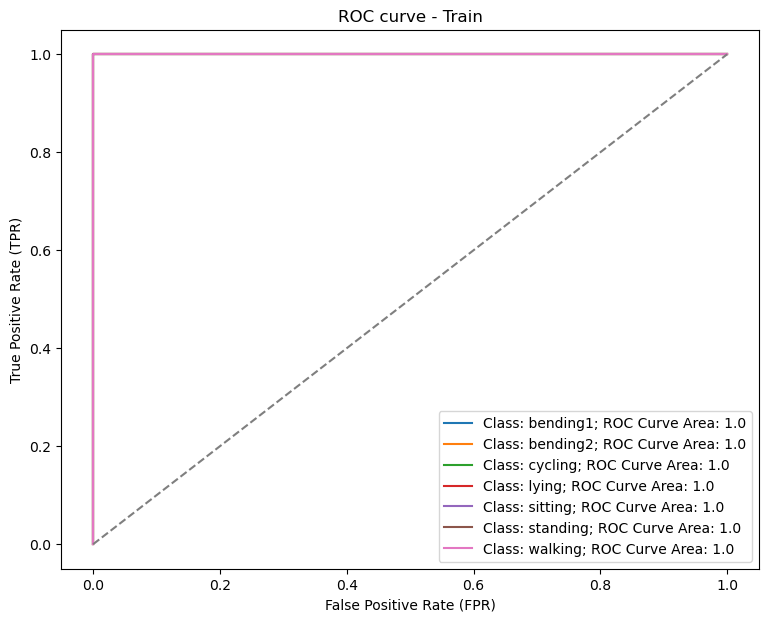


ROC Curve for Test Data


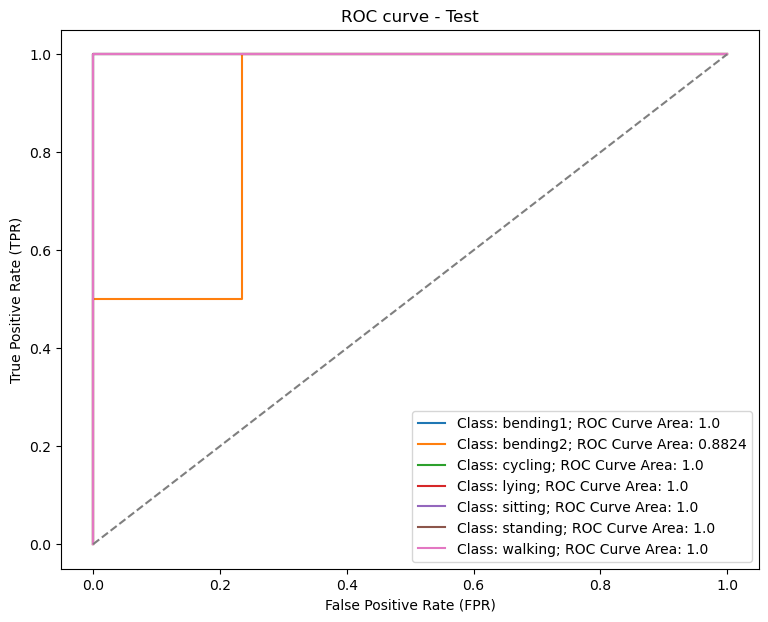

In [66]:
multinomial_regression_l1_penalty(train_paths, test_paths, best_l, cv_folds=5,cm_roc=True)

#### Test Error = 0.0526

#### 2 (c) (ii) Naive Bayes - Gaussian Prior

In [67]:
def naive_bayes_gaussian_prior(train_paths, test_paths, l, cv_folds,cm_roc=False):
    print("Naive Bayes Classifier with Gaussian Prior : l = "+str(l))
    train_df=get_df_with_splits_multi(train_paths,l)
    test_df=get_df_with_splits_multi(test_paths,l)
    train_X, train_Y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
    test_X, test_Y = test_df.iloc[:, :-1], test_df.iloc[:, -1]
    model = GaussianNB()
    model.fit(train_X, train_Y)
    train_score=model.score(train_X, train_Y)
    test_score=model.score(test_X, test_Y)
    train_error = round((1 - train_score), 4)
    test_error = round((1 - test_score), 4)
    if cm_roc==False:
        return [l, np.round(train_score,4),train_error,np.round(test_score,4),test_error]
   
    else:
        train_predict = model.predict_proba(train_X)
        test_predict = model.predict_proba(test_X)
        pred_y = model.predict(test_X)
        cm = confusion_matrix(test_Y, pred_y)
        
        print("Confusion matrix for Test Data:\n{}".format(cm))
        print("\nROC Curve for Train Data")
        #plot_roc(train_Y, train_predict, model)
        
        fig, axes = plt.subplots(figsize=(9, 7))
        axes.set_title("ROC curve - Train")
        for i, c in enumerate(model.classes_):
            y_prediction = train_predict[:, i]
            fpr, tpr, thresholds = roc_curve(train_Y, y_prediction, pos_label=c)
            roc_auc = auc(fpr, tpr)
            axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate (FPR)")
        axes.set_ylabel("True Positive Rate (TPR)")
        axes.legend()
        plt.show()
        
        print("\nROC Curve for Test Data")
        #plot_roc(test_Y, test_predict, model)
        fig, axes = plt.subplots(figsize=(9, 7))
        axes.set_title("ROC curve - Test")
        for i, c in enumerate(model.classes_):
            y_prediction = test_predict[:, i]
            fpr, tpr, thresholds = roc_curve(test_Y, y_prediction, pos_label=c)
            roc_auc = auc(fpr, tpr)
            axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate (FPR)")
        axes.set_ylabel("True Positive Rate (TPR)")
        axes.legend()
        plt.show()

In [68]:
best_score, best_l = 0, 1
result=[]
for l in l_values:
    #print(l)
    result.append(naive_bayes_gaussian_prior(train_paths, test_paths, l,cv_folds=5))
    if result[-1][1] > best_score:
        best_score = result[-1][1]
        best_l = l

Naive Bayes Classifier with Gaussian Prior : l = 1
Naive Bayes Classifier with Gaussian Prior : l = 2
Naive Bayes Classifier with Gaussian Prior : l = 3
Naive Bayes Classifier with Gaussian Prior : l = 4
Naive Bayes Classifier with Gaussian Prior : l = 5
Naive Bayes Classifier with Gaussian Prior : l = 6
Naive Bayes Classifier with Gaussian Prior : l = 7
Naive Bayes Classifier with Gaussian Prior : l = 8
Naive Bayes Classifier with Gaussian Prior : l = 9
Naive Bayes Classifier with Gaussian Prior : l = 10
Naive Bayes Classifier with Gaussian Prior : l = 11
Naive Bayes Classifier with Gaussian Prior : l = 12
Naive Bayes Classifier with Gaussian Prior : l = 13
Naive Bayes Classifier with Gaussian Prior : l = 14
Naive Bayes Classifier with Gaussian Prior : l = 15
Naive Bayes Classifier with Gaussian Prior : l = 16
Naive Bayes Classifier with Gaussian Prior : l = 17
Naive Bayes Classifier with Gaussian Prior : l = 18
Naive Bayes Classifier with Gaussian Prior : l = 19
Naive Bayes Classifie

In [69]:
result_naive_bayes_gaussian_prior = pd.DataFrame(result, columns = ['l', 'Train Score', 'Train Error','Test Score','Test Error'])
result_naive_bayes_gaussian_prior

l  Train Score  Train Error  Test Score  Test Error
0    1       1.0000       0.0000      0.8947      0.1053
1    2       1.0000       0.0000      0.6316      0.3684
2    3       0.9855       0.0145      0.7368      0.2632
3    4       1.0000       0.0000      0.7895      0.2105
4    5       0.9855       0.0145      0.7895      0.2105
5    6       0.9710       0.0290      0.6316      0.3684
6    7       1.0000       0.0000      0.7368      0.2632
7    8       0.9855       0.0145      0.7368      0.2632
8    9       1.0000       0.0000      0.6842      0.3158
9   10       1.0000       0.0000      0.7895      0.2105
10  11       0.9855       0.0145      0.6842      0.3158
11  12       1.0000       0.0000      0.6316      0.3684
12  13       1.0000       0.0000      0.7368      0.2632
13  14       1.0000       0.0000      0.5789      0.4211
14  15       1.0000       0.0000      0.5789      0.4211
15  16       1.0000       0.0000      0.5263      0.4737
16  17       1.0000       0.0000      0.5263      0.4737
17  18       1.0000       0.0000      0.6842      0.3158
18  19       1.0000       0.0000      0.4737      0.5263
19  20       1.0000       0.0000      0.5789      0.4211

In [70]:
print("Best l-value : "+ str(best_l))


Best l-value : 1


##### We consider the optimal l to be 1

Naive Bayes Classifier with Gaussian Prior : l = 1
Confusion matrix for Test Data:
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]

ROC Curve for Train Data


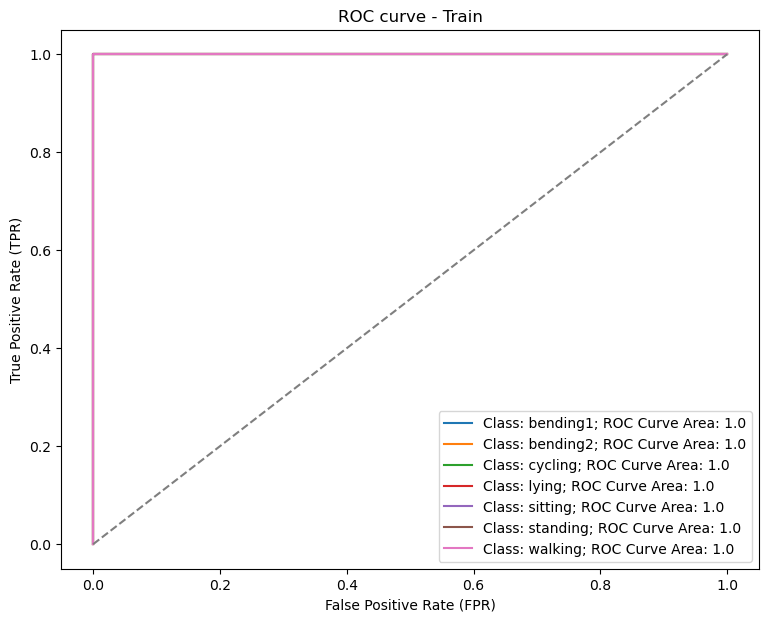


ROC Curve for Test Data


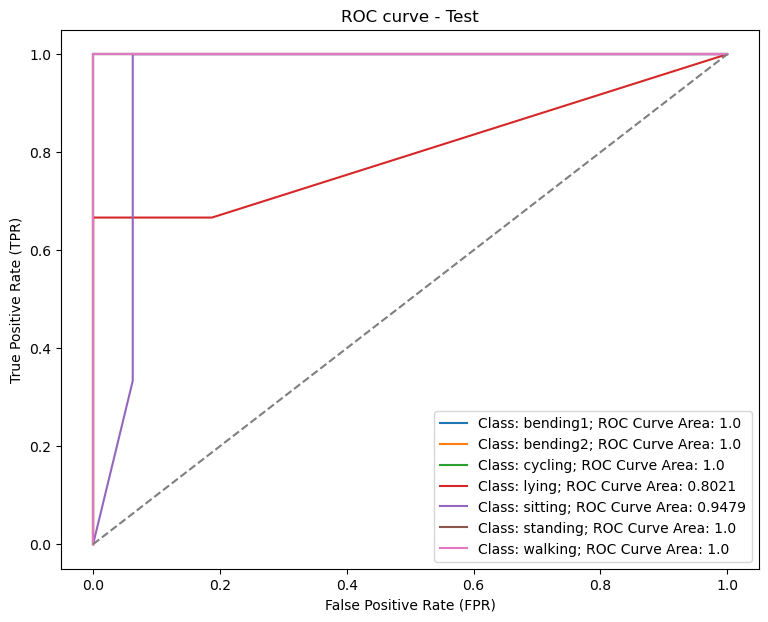

In [71]:
naive_bayes_gaussian_prior(train_paths, test_paths, best_l,cv_folds=5,cm_roc=True)

##### Test Error = 0.1053

### 2 (c) (ii) Naive Bayes - Multinomial Prior

In [72]:
def naive_bayes_multinomial_prior(train_paths, test_paths, l, cv_folds,cm_roc=False):
    print("Naive Bayes Classifier with Multinomial Prior : l = "+str(l))
    train_df=get_df_with_splits_multi(train_paths,l)
    test_df=get_df_with_splits_multi(test_paths,l)
    train_X, train_Y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
    test_X, test_Y = test_df.iloc[:, :-1], test_df.iloc[:, -1]
    model = MultinomialNB()
    #if cm_roc==True:
    model.fit(train_X, train_Y)
    train_score=model.score(train_X, train_Y)
    test_score=model.score(test_X, test_Y)
    train_error = round((1 - train_score), 4)
    test_error = round((1 - test_score), 4)
    if cm_roc==False:
        return [l, np.round(train_score,4),train_error,np.round(test_score,4),test_error]
    else:
        train_predict = model.predict_proba(train_X)
        test_predict = model.predict_proba(test_X)
        pred_y = model.predict(test_X)
        cm = confusion_matrix(test_Y, pred_y)
        
        print("Confusion matrix for Test Data:\n{}".format(cm))
        print("\nROC Curve for Train Data")
        #plot_roc(train_Y, train_predict, model)
        
        fig, axes = plt.subplots(figsize=(9, 7))
        axes.set_title("ROC curve - Train")
        for i, c in enumerate(model.classes_):
            y_prediction = train_predict[:, i]
            fpr, tpr, thresholds = roc_curve(train_Y, y_prediction, pos_label=c)
            roc_auc = auc(fpr, tpr)
            axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate (FPR)")
        axes.set_ylabel("True Positive Rate (TPR)")
        axes.legend()
        plt.show()
        
        print("\nROC Curve for Test Data")
        #plot_roc(test_Y, test_predict, model)
        fig, axes = plt.subplots(figsize=(9, 7))
        axes.set_title("ROC curve - Test")
        for i, c in enumerate(model.classes_):
            y_prediction = test_predict[:, i]
            fpr, tpr, thresholds = roc_curve(test_Y, y_prediction, pos_label=c)
            roc_auc = auc(fpr, tpr)
            axes.plot(fpr, tpr, label=f"Class: {c}; ROC Curve Area: {round(roc_auc, 4)}")
        axes.plot([0, 1], [0, 1], "--")
        axes.set_xlabel("False Positive Rate (FPR)")
        axes.set_ylabel("True Positive Rate (TPR)")
        axes.legend()
        plt.show()

In [77]:
best_score, best_l = 0, 1
result=[]
for l in l_values:
   # print(l)
    result.append(naive_bayes_multinomial_prior(train_paths, test_paths, l,cv_folds=5))
    if result[-1][1] > best_score:
        best_score = result[-1][1]
        best_l = l

Naive Bayes Classifier with Multinomial Prior : l = 1
Naive Bayes Classifier with Multinomial Prior : l = 2
Naive Bayes Classifier with Multinomial Prior : l = 3
Naive Bayes Classifier with Multinomial Prior : l = 4
Naive Bayes Classifier with Multinomial Prior : l = 5
Naive Bayes Classifier with Multinomial Prior : l = 6
Naive Bayes Classifier with Multinomial Prior : l = 7
Naive Bayes Classifier with Multinomial Prior : l = 8
Naive Bayes Classifier with Multinomial Prior : l = 9
Naive Bayes Classifier with Multinomial Prior : l = 10
Naive Bayes Classifier with Multinomial Prior : l = 11
Naive Bayes Classifier with Multinomial Prior : l = 12
Naive Bayes Classifier with Multinomial Prior : l = 13
Naive Bayes Classifier with Multinomial Prior : l = 14
Naive Bayes Classifier with Multinomial Prior : l = 15
Naive Bayes Classifier with Multinomial Prior : l = 16
Naive Bayes Classifier with Multinomial Prior : l = 17
Naive Bayes Classifier with Multinomial Prior : l = 18
Naive Bayes Classif

In [78]:
result_naive_bayes_multinomial_prior = pd.DataFrame(result, columns = ['l', 'Train Score', 'Train Error','Test Score', 'Test Error'])
result_naive_bayes_multinomial_prior

l  Train Score  Train Error  Test Score  Test Error
0    1       0.9275       0.0725      0.8947      0.1053
1    2       0.8841       0.1159      0.7368      0.2632
2    3       0.8986       0.1014      0.7895      0.2105
3    4       0.9130       0.0870      0.7895      0.2105
4    5       0.9275       0.0725      0.7368      0.2632
5    6       0.9565       0.0435      0.7368      0.2632
6    7       0.9420       0.0580      0.7368      0.2632
7    8       0.9420       0.0580      0.7368      0.2632
8    9       0.9420       0.0580      0.7368      0.2632
9   10       0.9420       0.0580      0.7368      0.2632
10  11       0.9420       0.0580      0.7368      0.2632
11  12       0.9420       0.0580      0.7368      0.2632
12  13       0.9420       0.0580      0.7895      0.2105
13  14       0.9420       0.0580      0.7895      0.2105
14  15       0.9420       0.0580      0.7895      0.2105
15  16       0.9420       0.0580      0.7895      0.2105
16  17       0.9420       0.0580      0.8421      0.1579
17  18       0.9420       0.0580      0.8421      0.1579
18  19       0.9420       0.0580      0.8421      0.1579
19  20       0.9420       0.0580      0.8421      0.1579

##### We consider the optimal l to be 6

Naive Bayes Classifier with Multinomial Prior : l = 6
Confusion matrix for Test Data:
[[2 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 0 3]]

ROC Curve for Train Data


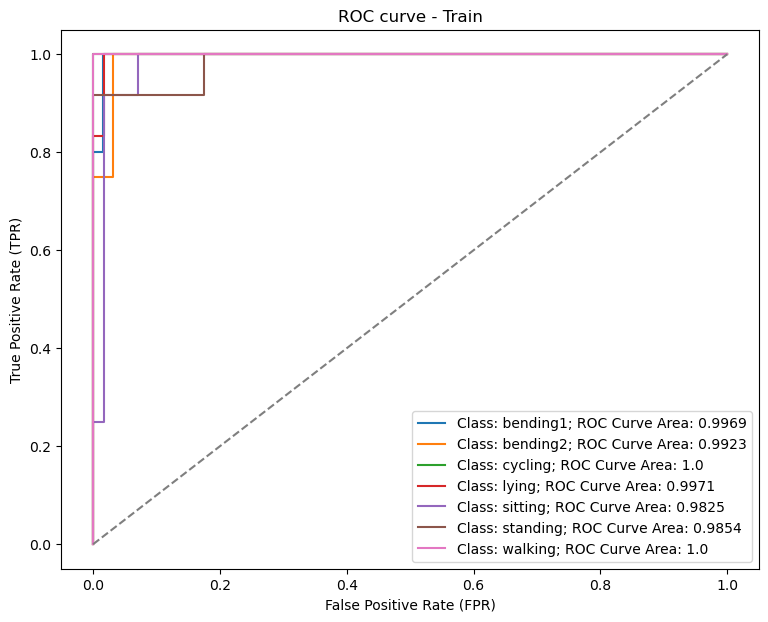


ROC Curve for Test Data


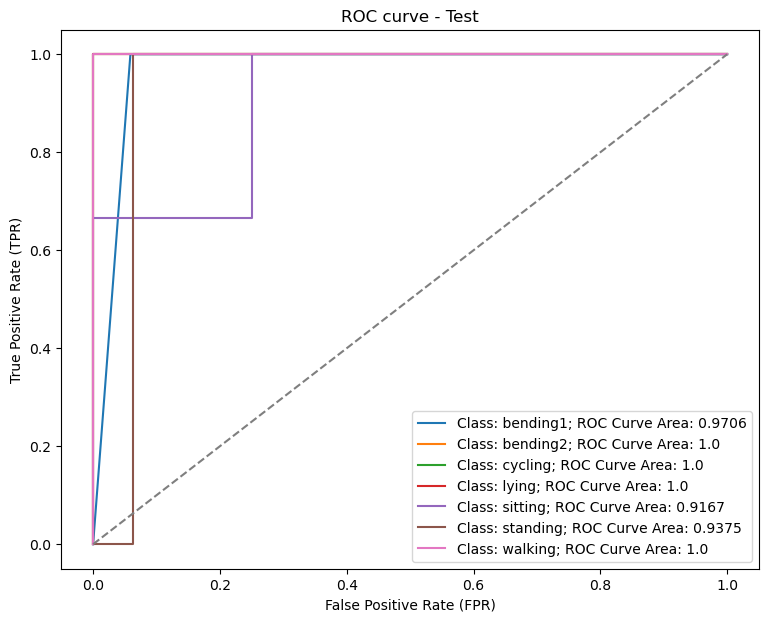

In [76]:
naive_bayes_multinomial_prior(train_paths, test_paths, best_l,cv_folds=5,cm_roc=True)

##### Test Error = 0.2632

#### Comparing the results in 2 (c) (ii)


#### By looking at the values of  accuracies, we can say that  Gaussian method is working relatively better than the Multinomial method 

### 2 (c) (iii) Which method is better for multi-class classification in this problem

#### The area under the ROC Curve (AUC), is comparatively better for Logistic Regression that any other classifier. Hence, logistic regression is better for multi-class classification in this problem

### ISLR 4.8.3

We can write posterior probability of the k-th class as follows using Bayes Theorem
$$p_k(x) = \frac {\pi_k \frac {1} {\sqrt{2 \pi} \sigma_k} \exp(- \frac {1} {2 \sigma_k^2} (x - \mu_k)^2) } {\sum { \pi_l \frac {1} {\sqrt{2 \pi} \sigma_k} \exp(- \frac {1} {2 \sigma_k^2} (x - \mu_l)^2) }}$$

The denominator term is common for all classes and the numerator discriminant function is the largest for the estimate k (idea used is that optimal class k is obtained for maximum value of the discriminant function)

  
Taking log of the numerator discriminant function, we get 
$$ \delta_k (x) = log(\pi_k) + log(\frac {1} {\sqrt{2 \pi} \sigma_k}) + (- \frac {1} {2 \sigma_k^2} (x - \mu_k)^2)$$


$$log(\pi_k) + log(\frac {1} {\sqrt{2 \pi} \sigma_k}) + (- \frac {1} {2 \sigma_k^2} (x)^2)+(- \frac {1} {2 \sigma_k^2} (\mu_k)^2) + ( \frac {1} {2 \sigma_k^2} (2x\mu_k))$$
  
  
Notice that the third term is a quadratic function of x and cannot be ignored as it depends on k. 
Therefore, the argument shows that the Bayes' classfier is not linear.

### ISLR 4.8.7

Density function for a random normal variable is $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-1}{2\sigma^2}(x - \mu)^2}$ 

The two classes are whether the company will issue a dividend this year (“yes” or “no”)

From Bayes theorem, we have the following:

$$Pr(Y=yes|X=x)=\frac{\pi_{yes} f_{yes}(x)}{\pi_{yes} f_{yes}(x) + \pi_{no} f_{no}(x)}$$

where $f_i(x) = \frac{1}{\sqrt{2\pi\sigma_i^2}}e^{\frac{-1}{2\sigma_i^2}(x - \mu_i)^2}$ 

Given:
$\pi_{yes} = 0.80$, 

$\pi_{no} = 0.20$, 

$f_{yes}(x)$ is the density function of a normal random variable with average = $10$ and variance = $36$,

$f_{no}(x)$ is the density function of a normal random variable with average = $0$ and variance = $36$.

On substituting these to the Bayes Theorem equation, we get: 

$$Pr(Y=Yes|X=4) = \frac{0.8e^{\frac{-1}{2*36}(4 - 10)^2}}{0.8e^{\frac{-1}{2*36}(4 - 10)^2} + 0.2e^{\frac{-1}{2*36}(4 - 0)^2}}$$

$$=\frac{0.8e^{\frac{-1}{72}(36)}}{0.8e^{\frac{-1}{72}(36)} + 0.2e^{\frac{-1}{72}(16)}}$$


Note: $\frac{1}{\sqrt{2\pi\sigma^2}}$ terms can be cancelled from the numerator and denominator since the variance is the same for both yes and no

$$Pr(Y=Yes|X=4) = 0.7519$$


## References

#### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
#### https://towardsdatascience.com/calculating-confidence-interval-with-bootstrapping-872c657c058d
#### https://www.askpython.com/python/examples/python-directory-listing
#### https://www.ncbi.nlm.nih.gov/books/NBK543532/
#### https://elizavetalebedeva.com/bootstrapping-confidence-intervals-the-basics/
#### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
#### https://saturncloud.io/blog/how-to-calculate-confidence-intervals-for-linear-regression/
#### https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-standard-deviation-in-a-statistical-data-set-169772/
#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#### https://stackoverflow.com/questions/44947574/what-is-the-meaning-of-mean-test-score-in-cv-result
#### https://stats.stackexchange.com/questions/407596/difference-between-model-fitting-and-cross-validation
#### https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html


##### Note : When there are ties, I have resolved them by choosing the first best value